In [200]:
# Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import statsmodels.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Read train and test data
data_train = pd.read_csv("train (1).csv")
data_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
data_train.shape

(69999, 172)

In [4]:
data_test = pd.read_csv("test (1).csv")
data_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
data_test.shape

(30000, 171)

In [6]:
data_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      69999 non-null  object
 1   last_date_of_month_7      69600 non-null  object
 2   last_date_of_month_8      69266 non-null  object
 3   date_of_last_rech_6       68898 non-null  object
 4   date_of_last_rech_7       68765 non-null  object
 5   date_of_last_rech_8       67538 non-null  object
 6   date_of_last_rech_data_6  17568 non-null  object
 7   date_of_last_rech_data_7  17865 non-null  object
 8   date_of_last_rech_data_8  18417 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [7]:
data_train.select_dtypes(include=['number']).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

In [8]:
data_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [9]:
#EDA process

#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [10]:
#Checking data in columns having null values
for i in data_train.columns:
    print(i,data_train[i].unique())

id [    0     1     2 ... 69996 69997 69998]
circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
arpu_6 [ 31.277   0.     60.806 ... 372.088 238.575 168.269]
arpu_7 [ 87.009 122.787 103.176 ... 258.374 245.414  42.815]
arpu_8 [  7.527  42.953   0.    ... 279.782 145.062 167.961]
onnet_mou_6 [ 48.58   0.     0.53 ... 486.49 399.01 116.54]
onnet_mou_7 [124.38   0.    15.93 ... 453.83 378.21 283.63]
onnet_mou_8 [  1.29   0.     6.13 ... 458.79 380.99 232.63]
offnet_mou_6 [ 32.24   0.    53.99 ... 617.98 360.88 575.46]
offnet_mou_7 [ 96.68  25.99  82.05 ... 772.53 645.89 236.61]
offnet_mou_8 [  2.33  30.89   0.   ...  79.16 783.66 263.84]
roam_ic_mou_6 [  0.    53.64  28.26 ... 221.03  48.39 377.24]
roam_ic_mou_7 [  0.    11.31   7.23 ...  64.53 189.64  37.41]
roam_ic_mou_8 [  0.    47.81   3.46 ... 199.44  51.84 506.26]
roam_og_mou_6 [  0.

total_og_mou_8 [   3.63   31.66    0.   ... 1099.61  366.08  800.08]
loc_ic_t2t_mou_6 [  2.43   1.68   4.51 ... 270.91  95.84 242.98]
loc_ic_t2t_mou_7 [  3.68  19.09   6.16 ... 378.58 174.98 212.36]
loc_ic_t2t_mou_8 [  7.79  10.53   6.49 ... 159.63 114.93  79.34]
loc_ic_t2m_mou_6 [  0.83   1.41  89.86 ... 326.73 270.69 548.33]
loc_ic_t2m_mou_7 [ 21.08  18.68  25.18 ... 315.53 224.04 361.33]
loc_ic_t2m_mou_8 [ 16.91  11.09  23.51 ... 199.56 376.59 224.98]
loc_ic_t2f_mou_6 [  0.     0.35   7.23 ... 105.14  91.13 339.11]
loc_ic_t2f_mou_7 [  0.     1.66   0.81 ...  52.41  70.04 236.16]
loc_ic_t2f_mou_8 [  0.     3.4    6.14 ... 108.84  70.61 147.74]
loc_ic_mou_6 [  3.26   3.44  94.38 ... 578.68  97.24 529.48]
loc_ic_mou_7 [ 24.76  39.44  31.34 ... 548.26 270.41 334.09]
loc_ic_mou_8 [ 24.71  25.03  30.01 ... 367.01 257.76 412.01]
std_ic_t2t_mou_6 [  0.    11.69   3.58 ...  53.03 182.64  40.93]
std_ic_t2t_mou_7 [  7.61   0.     4.34 ...  56.03  62.98 283.79]
std_ic_t2t_mou_8 [  0.21   0.    

 '8/2/2014' '8/3/2014']
last_day_rch_amt_6 [  65    0   70  110   25   30  198  200  128   98   26  145   44   20
  120   99   33  215  104  505   10   36   50   17   67   46  154  550
  150  252  250   55   91  350   14   56   27  400   48   71   47   23
   77   95   41  398    9   86  229  100 3010  274   90  300   19   37
   28  455  500  855   40  202  152  459  102 1000   24  339  279  179
  619  330    7   75  325  107  175  220   13   29  169  225   15   68
  750   54   31  159   59  297  195  269   93   89 1001  565   35   12
  319   97 1479    5   49   94  440  124  153   18  655   22  755  219
   69   62 2000  106   76  101   84   21  379 1649   52  790  125  752
   58 1098  951   60  147  116 1555  194  849  410  126 4010  249 1050
   42   78 2100   32   53   45  236  390  148 2933  155  399   39  887
 1580   34 1010   80   38   16  199 3100  180   43 1255  599 2010 3299
  779 1500  498   82  825  129  191   63  197 3350  650]
last_day_rch_amt_7 [  65    0   50  110   10   2

av_rech_amt_data_7 [       nan 1.4500e+02 1.9100e+02 1.9800e+02 4.6000e+01 3.0400e+02
 2.5000e+01 1.5400e+02 5.0000e+01 2.1000e+02 3.9600e+02 3.4000e+01
 2.5200e+02 1.5000e+02 1.0200e+02 2.2100e+02 1.7000e+01 3.0800e+02
 3.1000e+01 3.0000e+02 1.3400e+02 1.9600e+02 1.4200e+02 5.0400e+02
 1.8900e+02 2.1500e+02 7.5000e+01 1.1500e+02 3.4200e+02 1.6800e+02
 4.0400e+02 7.5600e+02 4.4900e+02 1.1000e+02 5.2000e+01 1.2500e+02
 9.3900e+02 3.2900e+02 1.5100e+02 9.8000e+01 4.0600e+02 5.5600e+02
 1.0000e+02 4.1900e+02 1.0600e+02 5.2000e+02 9.2000e+01 2.4800e+02
 1.6100e+02 1.4000e+01 4.5800e+02 2.7900e+02 2.0400e+02 7.3000e+02
 2.2300e+02 1.4400e+02 1.6500e+02 4.5500e+02 3.3000e+01 8.5500e+02
 1.7600e+02 1.4900e+02 5.6000e+01 4.0200e+02 6.4000e+01 2.1100e+02
 1.9900e+02 8.9800e+02 3.4500e+02 1.0100e+02 2.4600e+02 6.8000e+01
 2.1800e+02 2.8700e+02 1.9200e+02 1.7900e+02 2.7400e+02 1.0300e+02
 5.8000e+01 3.9800e+02 2.5400e+02 8.5000e+01 2.3000e+01 4.0000e+00
 3.4400e+02 2.2500e+02 2.8000e+01 2.2900e+0

av_rech_amt_data_8 [       nan 1.4200e+02 1.9800e+02 1.5400e+02 2.3000e+01 2.1400e+02
 2.5200e+02 4.2700e+02 4.1000e+01 3.0400e+02 5.9000e+01 3.0800e+02
 1.2500e+02 5.0400e+02 5.1000e+01 9.8000e+01 4.0400e+02 8.7000e+01
 1.4900e+02 4.2400e+02 9.4000e+01 6.4000e+01 2.5000e+01 3.5800e+02
 4.9000e+01 7.3000e+01 3.2400e+02 1.0000e+02 2.5000e+02 6.9000e+01
 5.0000e+01 1.3800e+02 7.0000e+01 1.7000e+01 5.6000e+01 4.8000e+01
 1.9500e+02 3.1300e+02 4.0600e+02 3.4600e+02 4.4900e+02 1.5000e+02
 1.4500e+02 1.7900e+02 5.4500e+01 2.7400e+02 2.0000e+02 3.5000e+02
 4.5000e+02 1.7500e+02 2.1800e+02 7.1000e+01 6.7000e+01 2.6000e+02
 9.2000e+01 7.5000e+01 1.1500e+02 4.6600e+02 2.7500e+02 1.5900e+02
 3.6700e+02 1.8200e+02 8.0000e+00 3.8100e+02 2.0400e+02 4.6000e+01
 3.3000e+01 3.2600e+02 3.2900e+02 2.2000e+01 5.0500e+02 4.3400e+02
 1.3000e+01 9.5100e+02 1.0800e+02 3.4700e+02 1.3000e+02 4.9500e+01
 2.2700e+02 1.0100e+02 2.8700e+02 3.2800e+02 9.1000e+01 7.5600e+02
 2.9000e+02 3.7700e+02 1.4800e+02 2.2900e+0

night_pck_user_8 [nan  0.  1.]
monthly_2g_6 [0 1 2 3 4]
monthly_2g_7 [0 1 2 4 3 5]
monthly_2g_8 [0 1 2 4 3 5]
sachet_2g_6 [ 0  7  1  3 10  2  4 11  6  8  5  9 12 13 15 20 21 42 14 16 22 25 19 18
 30 28 17 24 32 34]
sachet_2g_7 [ 0  6  2  1  3 11  5  4  9  7  8 10 13 17 12 18 15 14 32 16 19 48 26 20
 30 23 22 21 25 27 24 35 42]
sachet_2g_8 [ 0  6  1  2  5  3  4 10  7 14 16  8  9 12 13 21 11 22 15 20 23 31 24 18
 17 44 19 32 27 29 25 34]
monthly_3g_6 [0 1 2 4 3 5 6 8 7 9]
monthly_3g_7 [ 0  1  2  3  5  4  8  6  7 16 14  9 10]
monthly_3g_8 [ 0  1  2  3  4  8  5  6  9  7 16 10]
sachet_3g_6 [ 0  3  1  2  4  7  6 16  5 11  9 10 13 17 14  8 19 18 23 22 15 29 12]
sachet_3g_7 [ 0  1  4  2  7  5  6  3  9 15 11  8 12 13 24 18 10 17 20 14 33 22 31 19
 16 21]
sachet_3g_8 [ 0  1  6  5  2  8  3  7  4 41  9 10 11 16 29 15 13 18 12 20 23 19 14 21
 17 30 25 38]
fb_user_6 [nan  1.  0.]
fb_user_7 [nan  1.  0.]
fb_user_8 [nan  1.  0.]
aon [1958  710  882 ... 3330 3491 2913]
aug_vbc_3g [  0.    82.26   1.05 

In [11]:
print(data_train.id.duplicated().sum()) #checking if any duplicate rows based on id column

0


In [12]:
#Dropping columns which has all values 0
drop_0_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                  'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data_train.drop(drop_0_columns,axis=1,inplace = True)
data_test.drop(drop_0_columns,axis=1,inplace = True)

In [13]:
#fill 0 to nan value
fill_0_columns = data_train.select_dtypes(include=['number']).columns
data_train[fill_0_columns] = data_train[fill_0_columns].fillna(0)

In [14]:
fill_0_columns = data_test.select_dtypes(include=['number']).columns

data_test[fill_0_columns] = data_test[fill_0_columns].fillna(0)

In [15]:
for i in data_train.select_dtypes(include=['object']).columns:
    print(i,data_train[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
date_of_last_rech_6 ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7 ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
date_of_last_rech_8 ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2

In [16]:
data_train['last_date_of_month_7'] = data_train['last_date_of_month_7'].fillna('7/31/2014')
data_train['last_date_of_month_8'] = data_train['last_date_of_month_8'].fillna('8/31/2014')
data_train['date_of_last_rech_6'] = data_train['date_of_last_rech_6'].fillna('6/30/2014')
data_train['date_of_last_rech_7'] = data_train['date_of_last_rech_7'].fillna('7/31/2014')
data_train['date_of_last_rech_8'] = data_train['date_of_last_rech_8'].fillna('8/31/2014')
data_train['date_of_last_rech_data_6'] = data_train['date_of_last_rech_data_6'].fillna('6/30/2014')
data_train['date_of_last_rech_data_7'] = data_train['date_of_last_rech_data_7'].fillna('7/31/2014')
data_train['date_of_last_rech_data_8'] = data_train['date_of_last_rech_data_8'].fillna('8/31/2014')

data_test['last_date_of_month_7'] = data_test['last_date_of_month_7'].fillna('7/31/2014')
data_test['last_date_of_month_8'] = data_test['last_date_of_month_8'].fillna('8/31/2014')
data_test['date_of_last_rech_6'] = data_test['date_of_last_rech_6'].fillna('6/30/2014')
data_test['date_of_last_rech_7'] = data_test['date_of_last_rech_7'].fillna('7/31/2014')
data_test['date_of_last_rech_8'] = data_test['date_of_last_rech_8'].fillna('8/31/2014')
data_test['date_of_last_rech_data_6'] = data_test['date_of_last_rech_data_6'].fillna('6/30/2014')
data_test['date_of_last_rech_data_7'] = data_test['date_of_last_rech_data_7'].fillna('7/31/2014')
data_test['date_of_last_rech_data_8'] = data_test['date_of_last_rech_data_8'].fillna('8/31/2014')

In [17]:
#dropping 2 columns since thier data is not significant and all are unique values
data_train.drop(['circle_id'],axis=1,inplace=True)

data_test.drop(['circle_id'],axis=1,inplace=True)

In [18]:
data_train.shape

(69999, 162)

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, id to churn_probability
dtypes: float64(126), int64(27), object(9)
memory usage: 86.5+ MB


In [20]:
#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

Series([], dtype: float64)

0    89.81
1    10.19
Name: churn_probability, dtype: float64


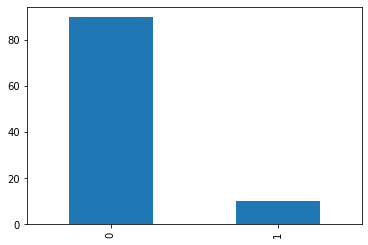

In [21]:
##Univariate Variables Starts

# target column is churn_probability we will start analysis
print(round(data_train.churn_probability.value_counts()*100/len(data_train),2))
round(data_train.churn_probability.value_counts()*100/len(data_train),2).plot.bar()
plt.show()
#Observation :
#89% is 0 churn probability
#10* is 1 churn probability

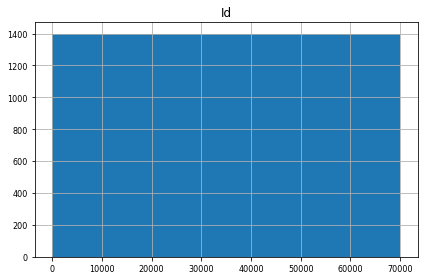

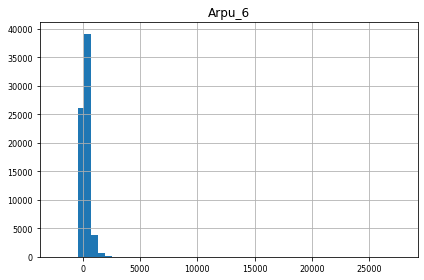

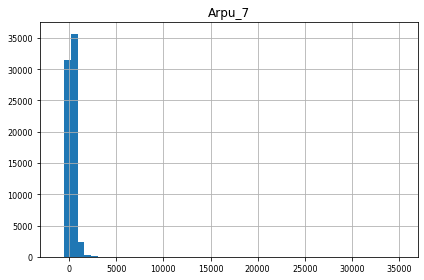

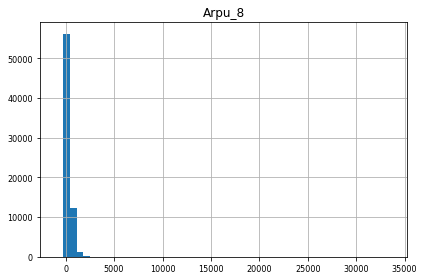

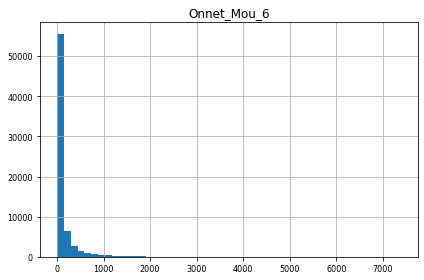

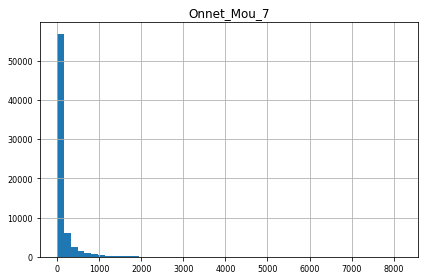

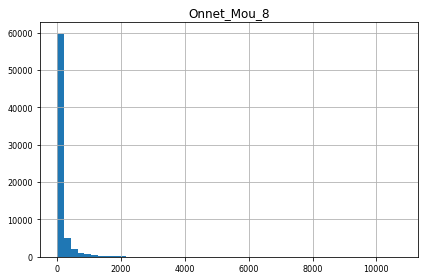

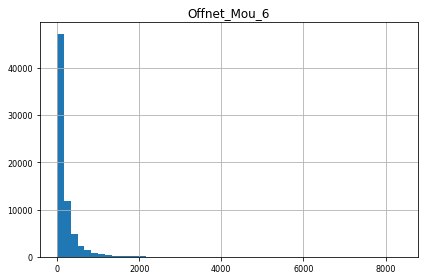

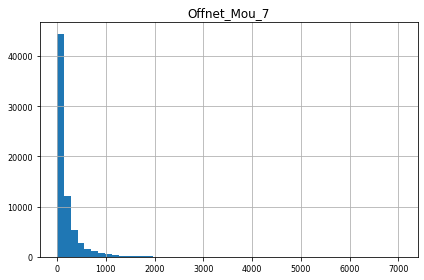

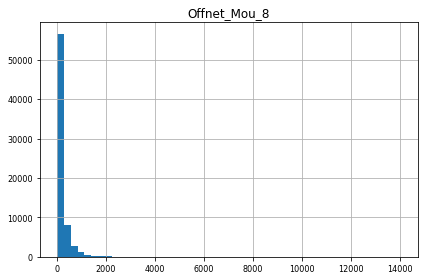

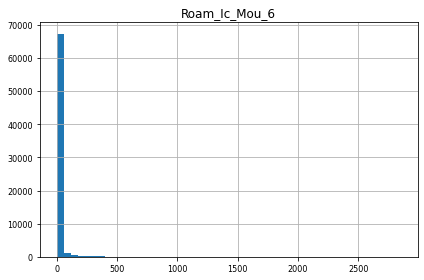

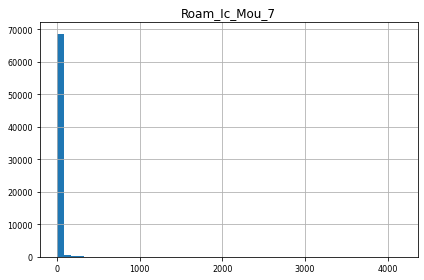

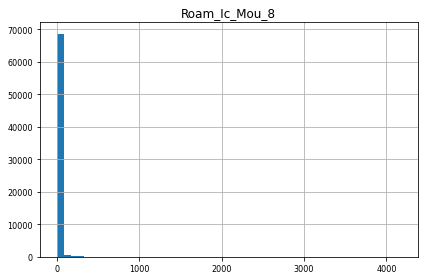

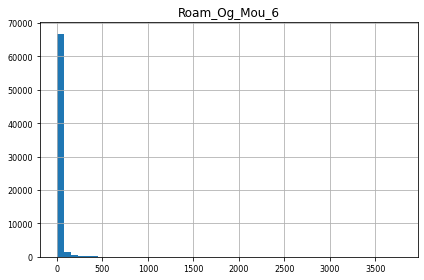

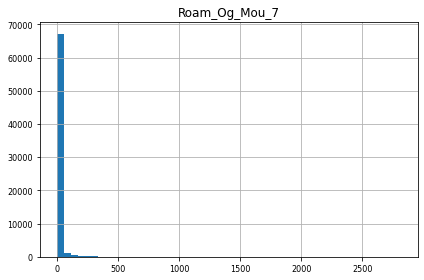

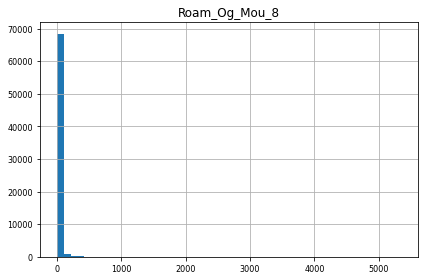

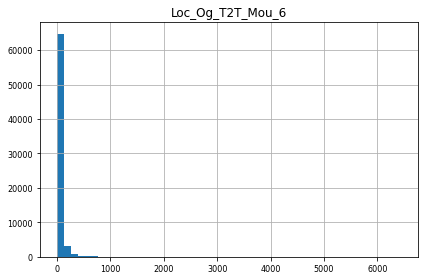

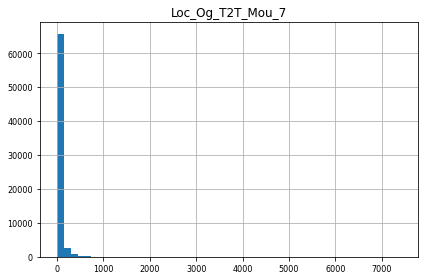

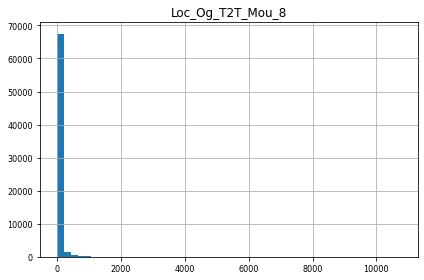

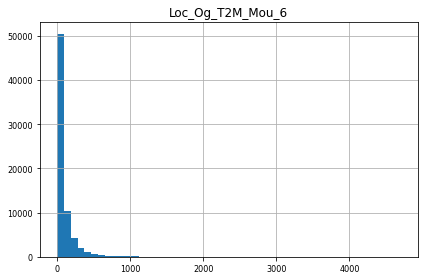

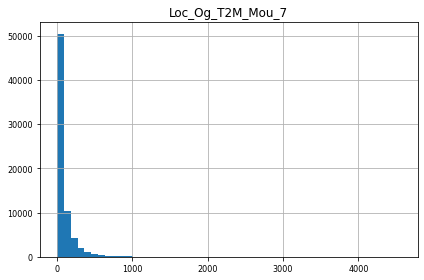

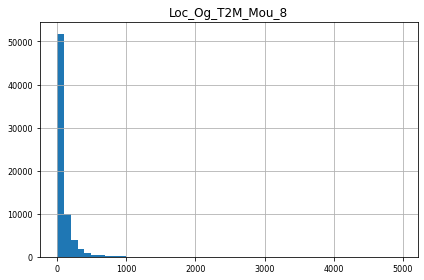

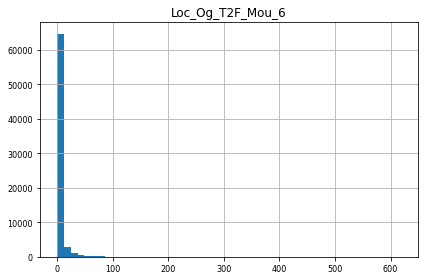

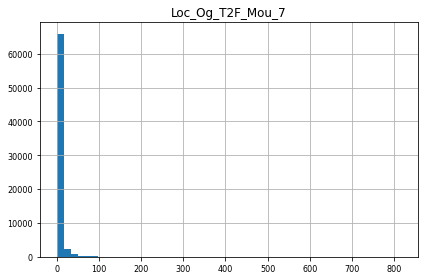

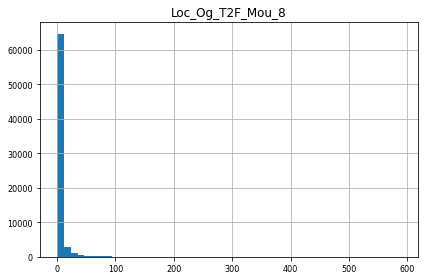

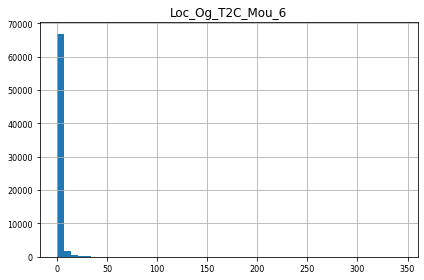

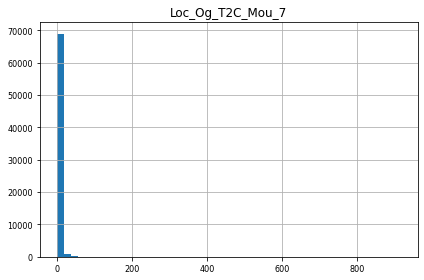

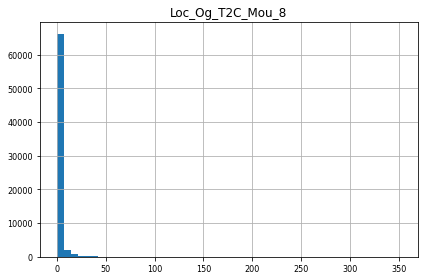

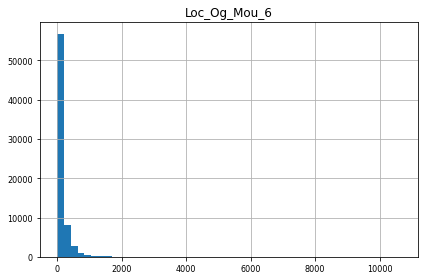

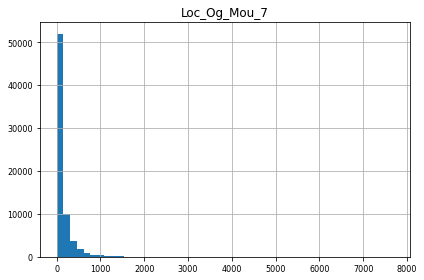

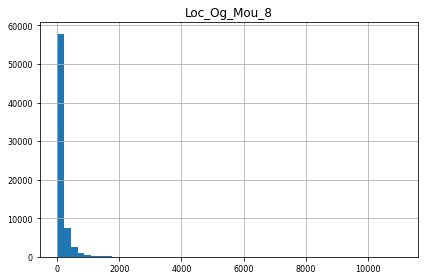

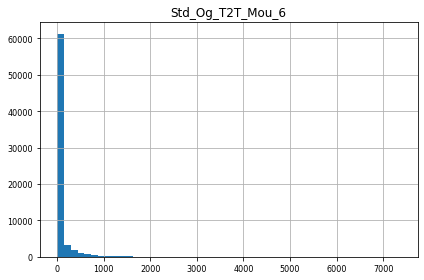

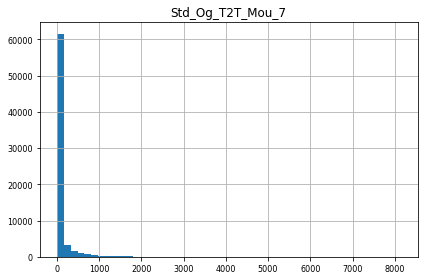

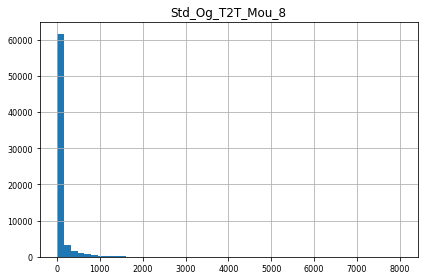

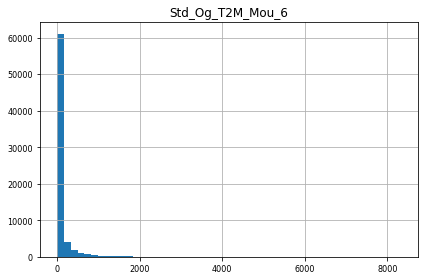

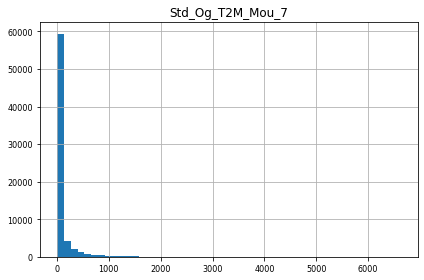

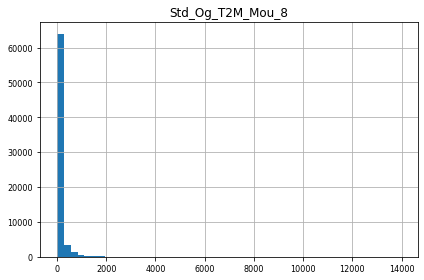

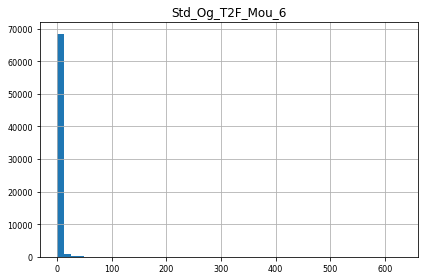

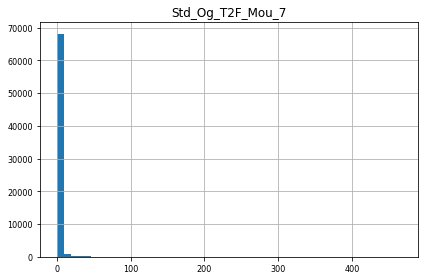

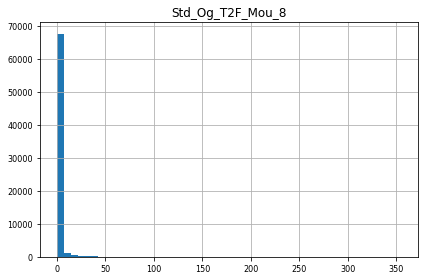

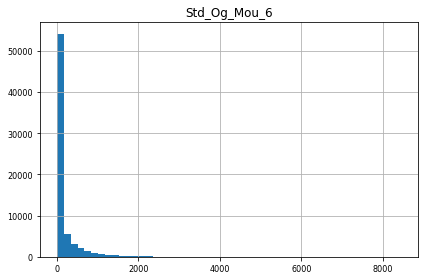

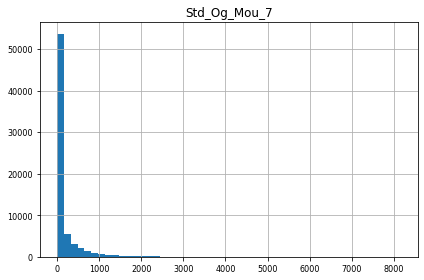

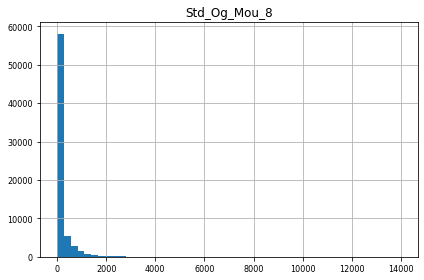

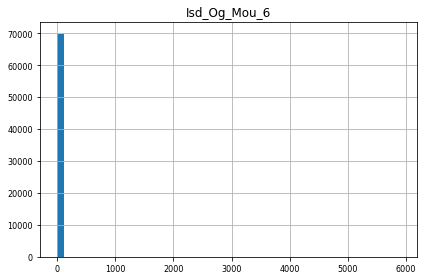

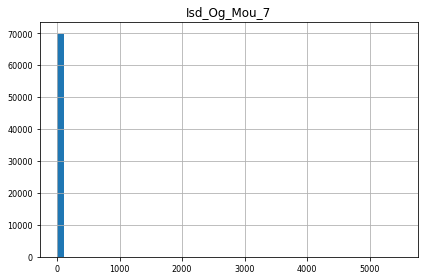

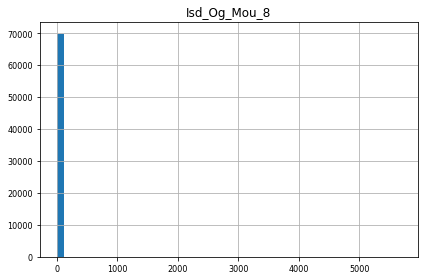

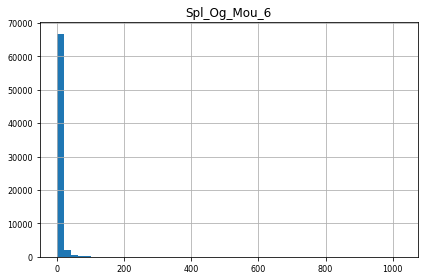

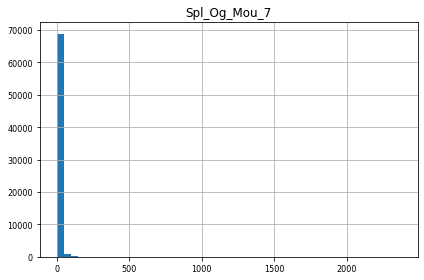

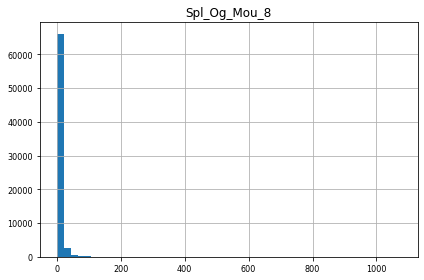

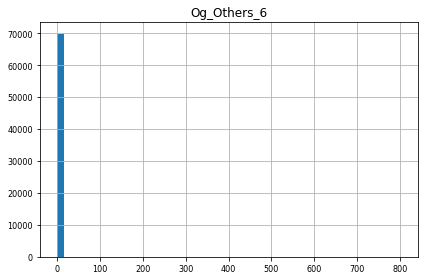

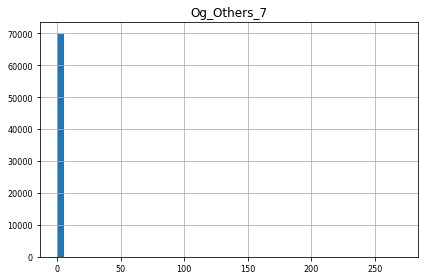

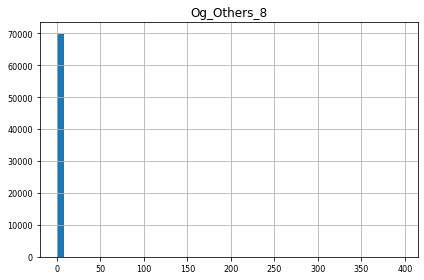

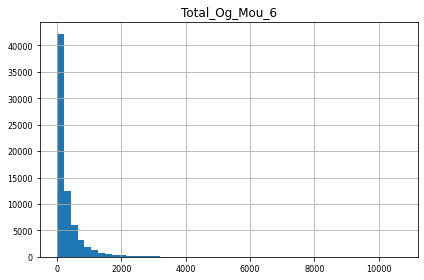

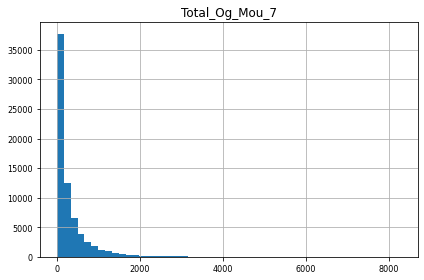

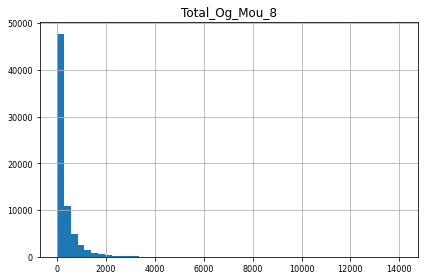

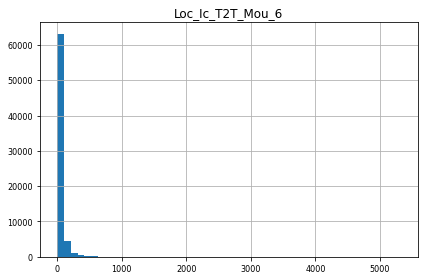

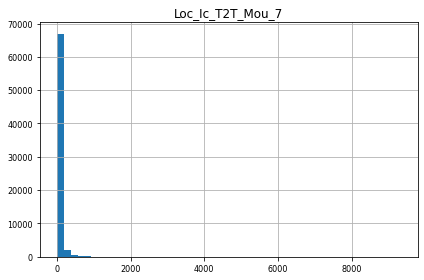

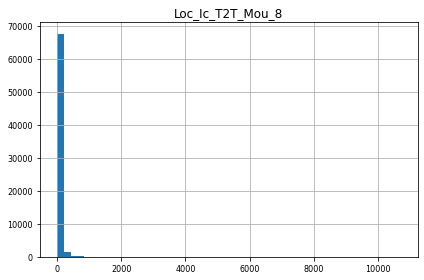

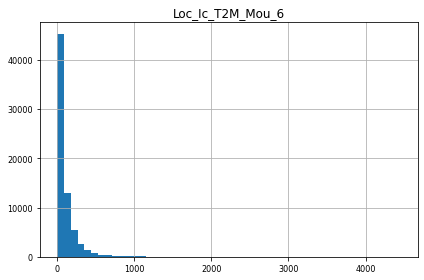

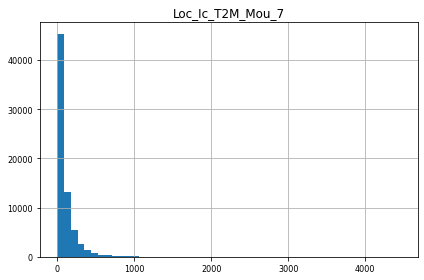

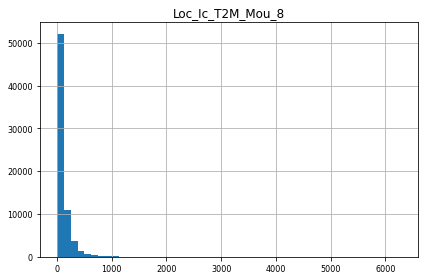

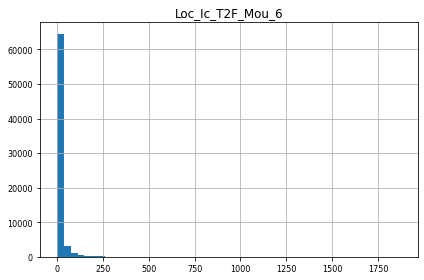

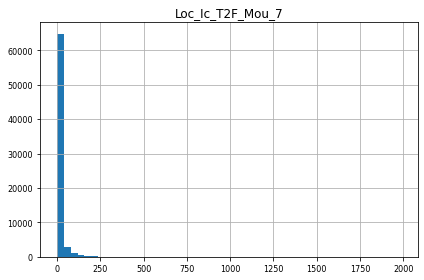

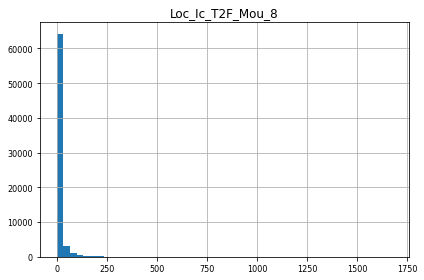

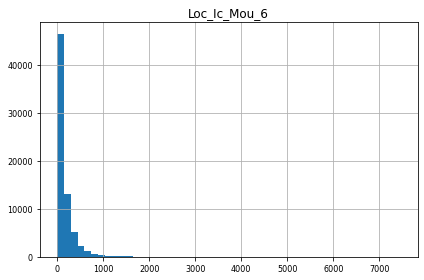

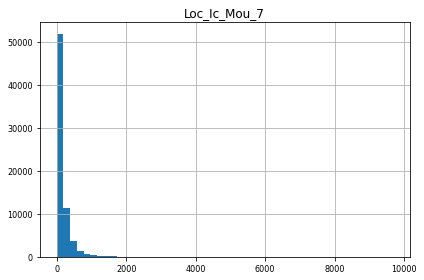

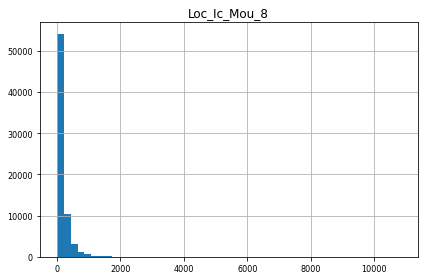

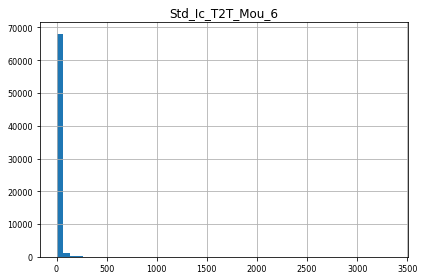

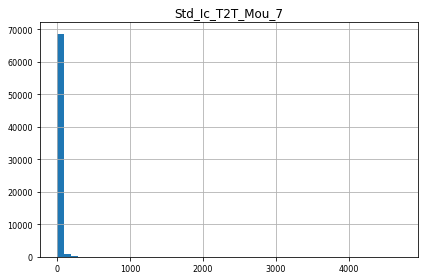

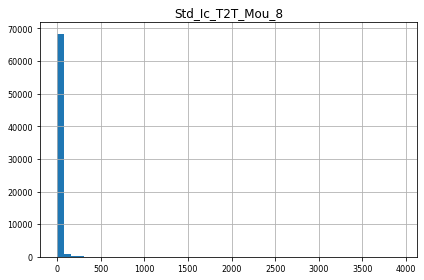

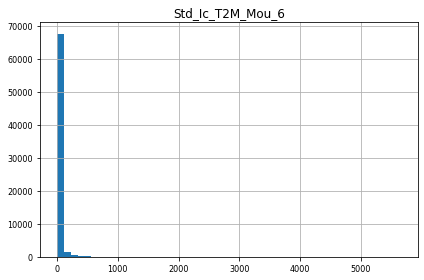

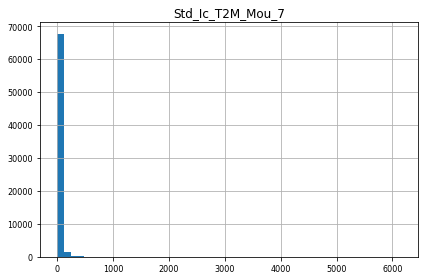

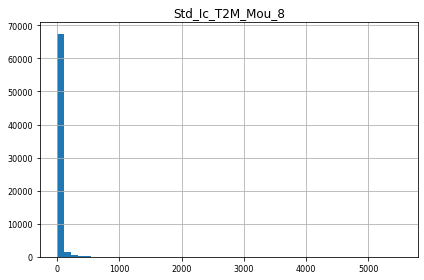

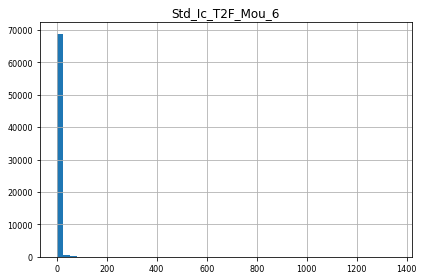

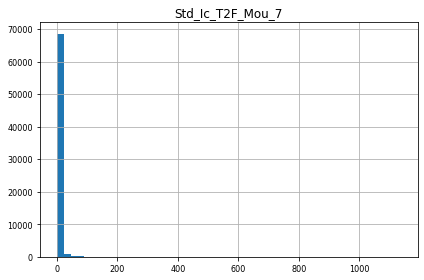

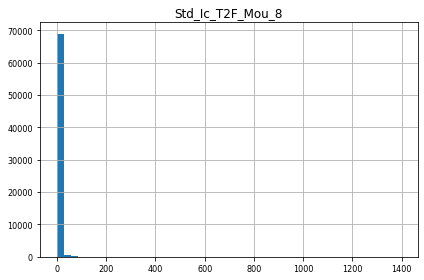

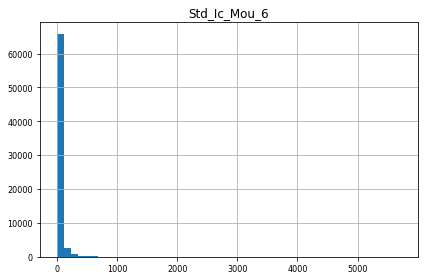

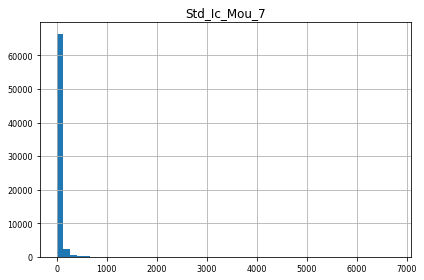

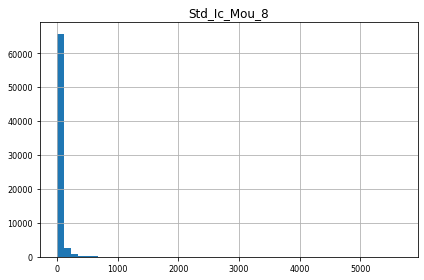

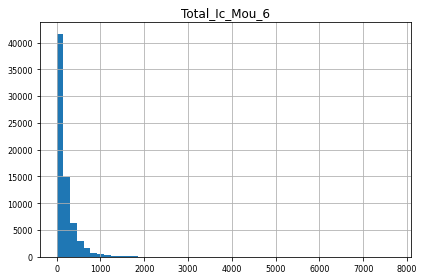

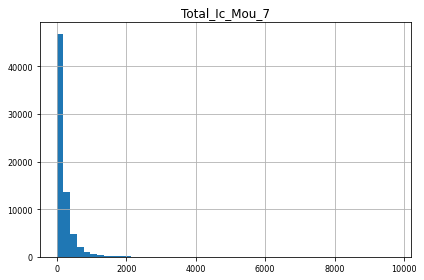

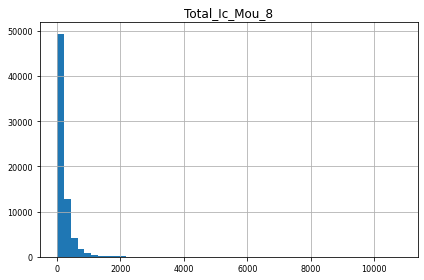

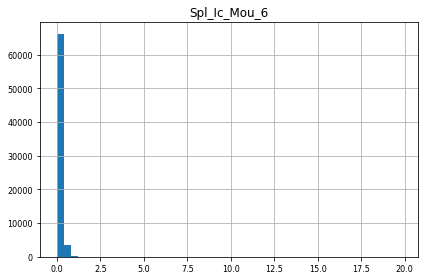

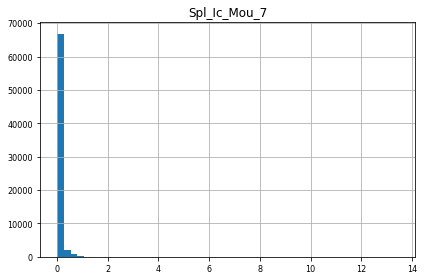

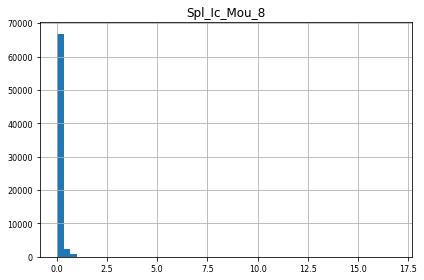

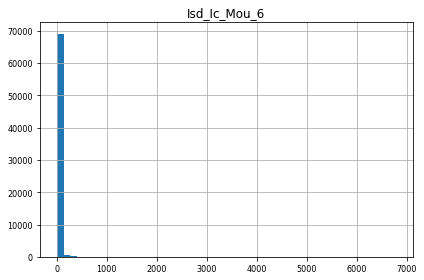

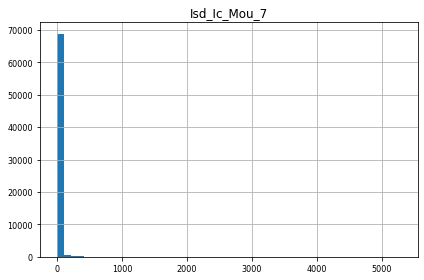

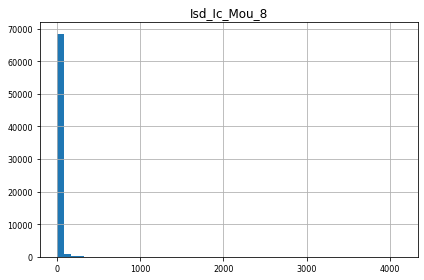

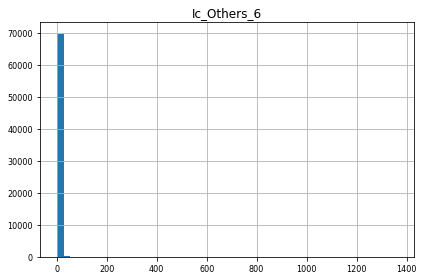

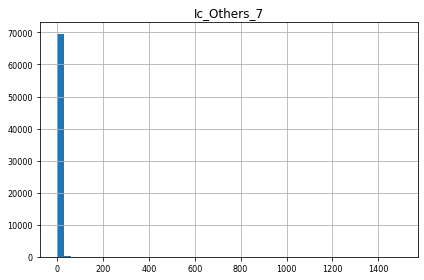

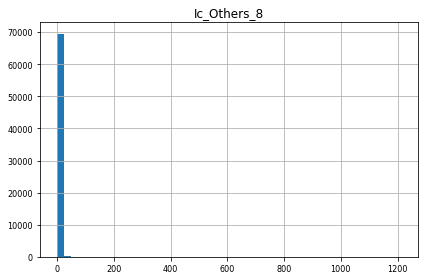

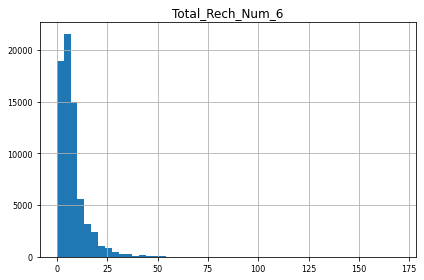

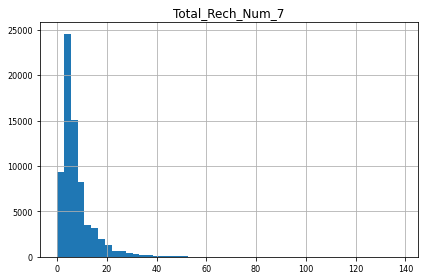

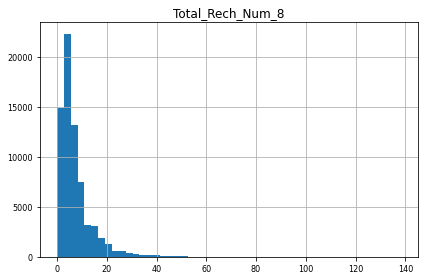

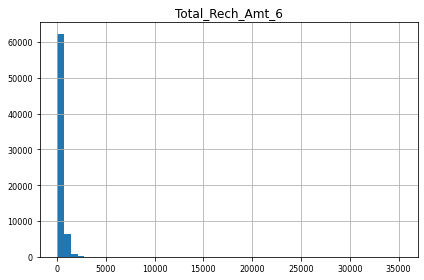

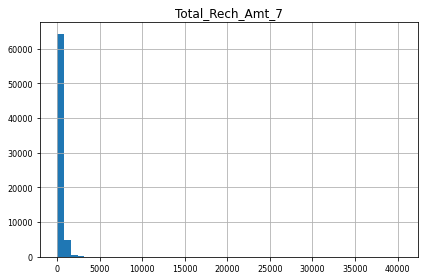

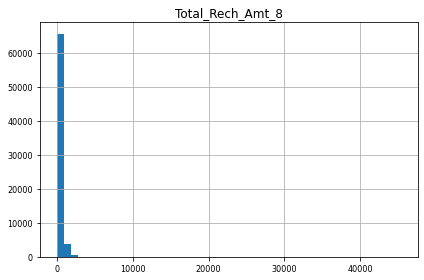

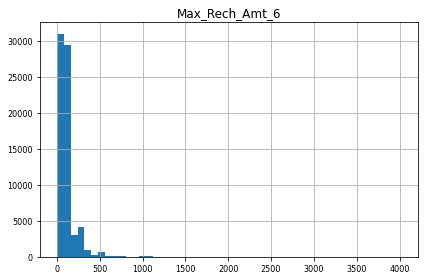

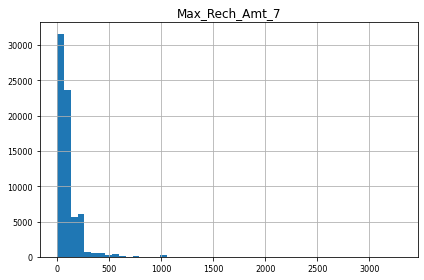

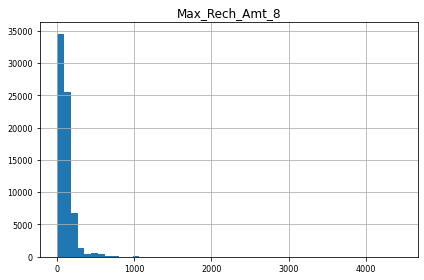

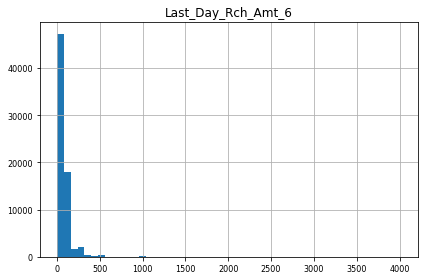

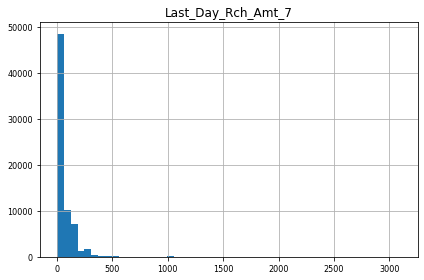

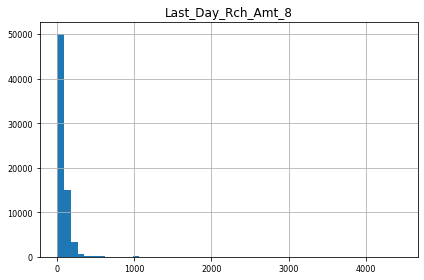

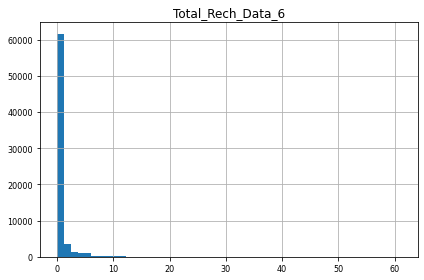

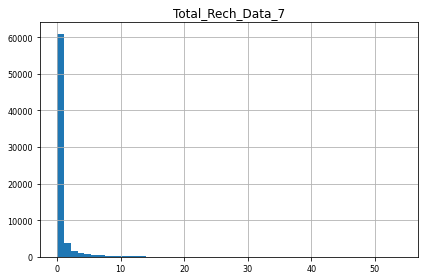

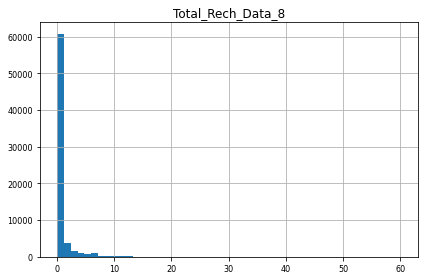

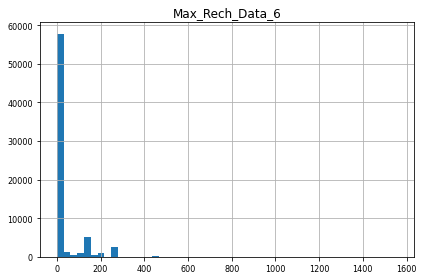

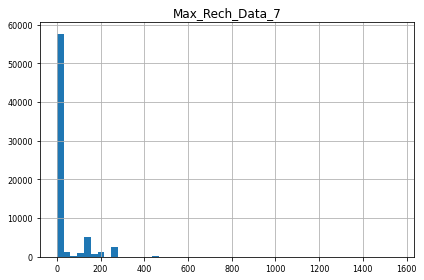

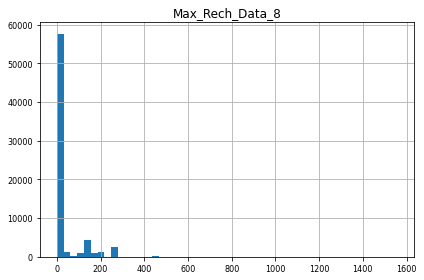

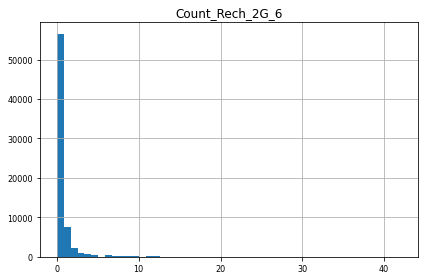

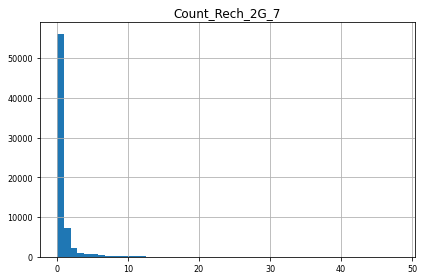

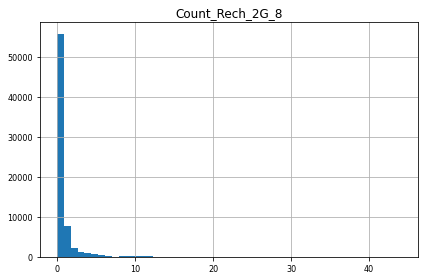

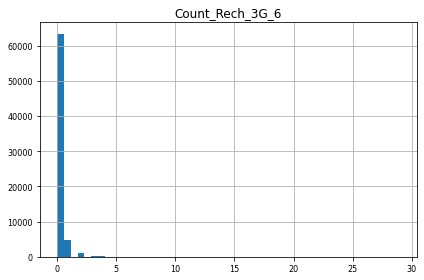

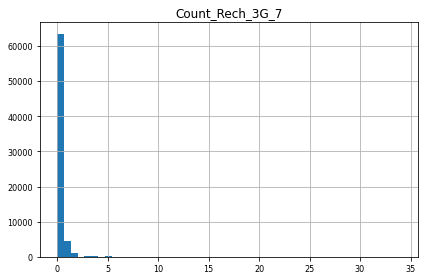

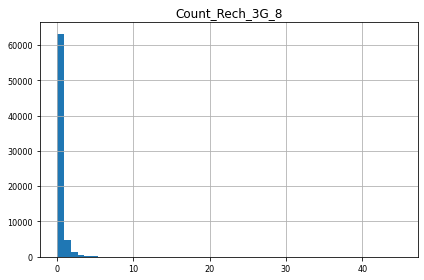

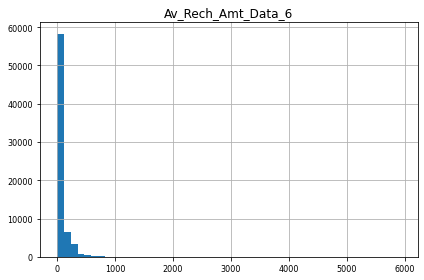

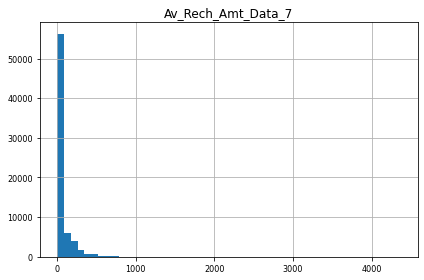

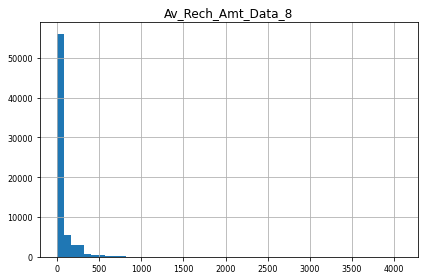

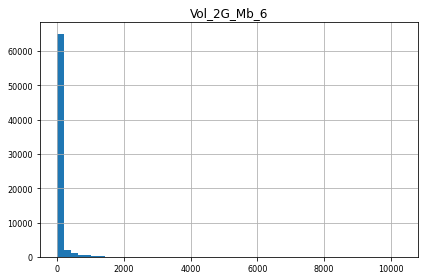

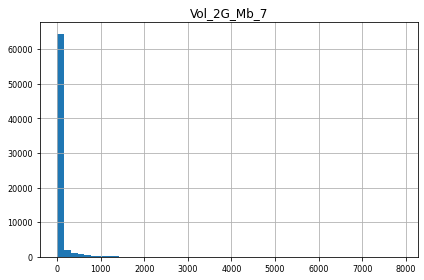

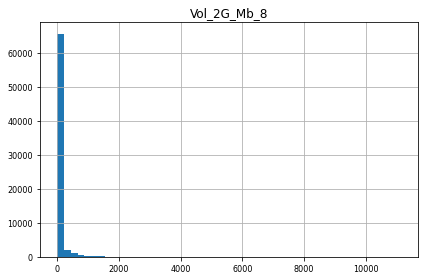

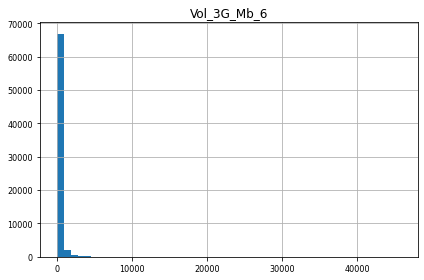

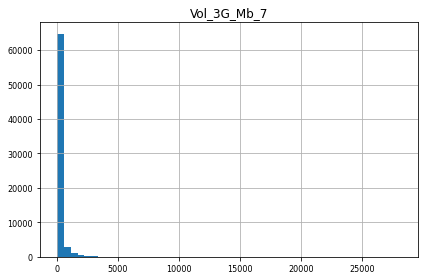

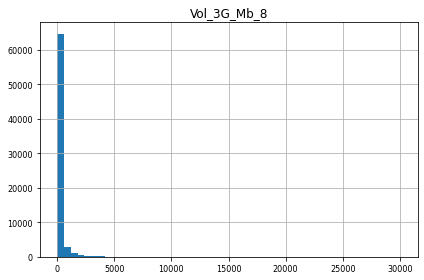

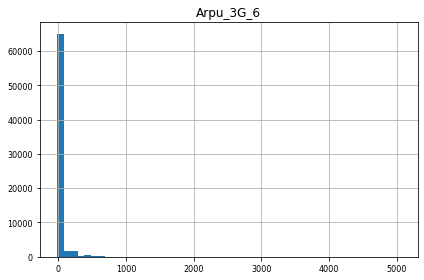

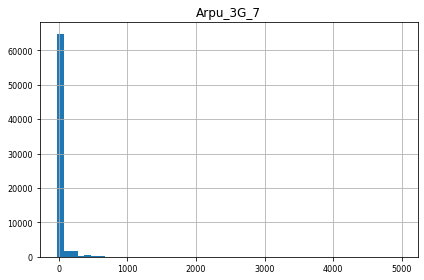

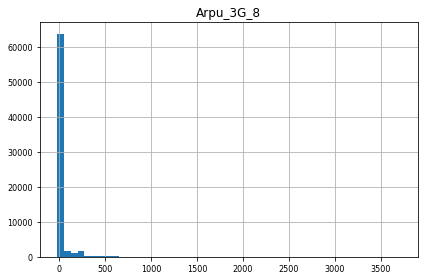

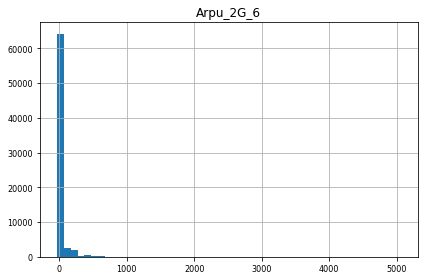

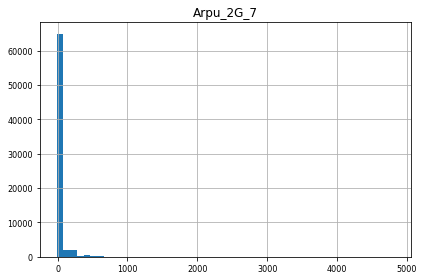

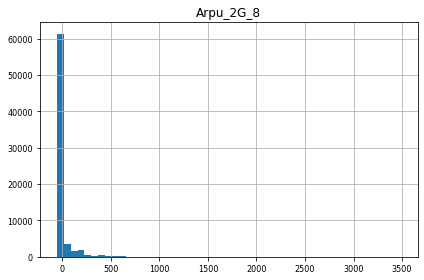

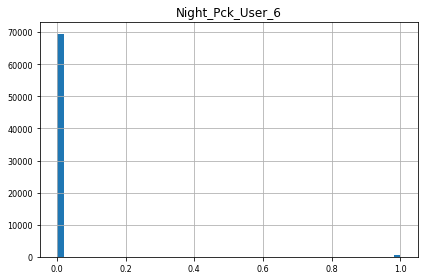

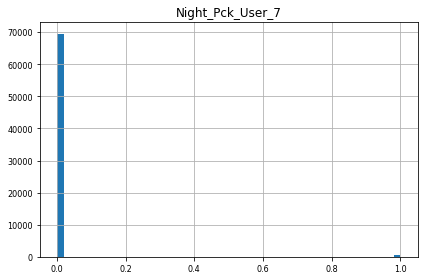

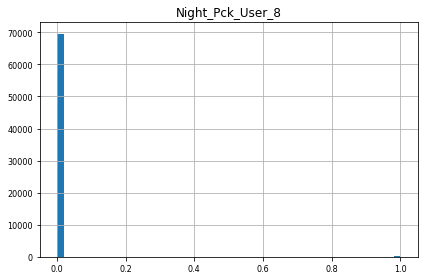

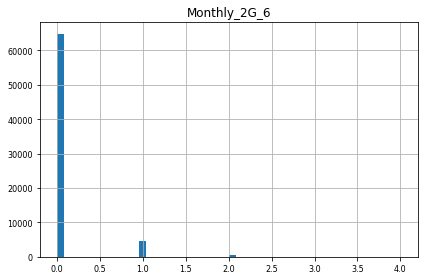

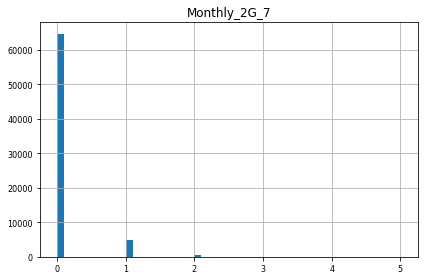

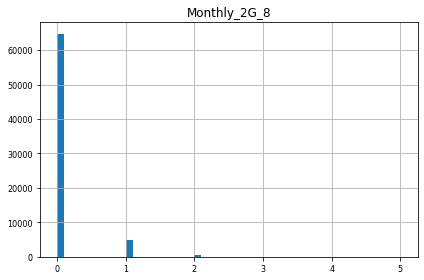

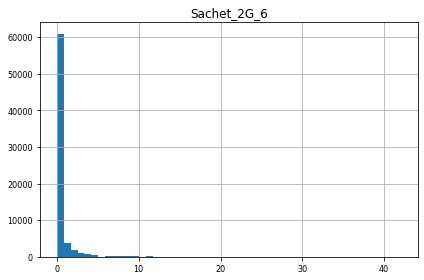

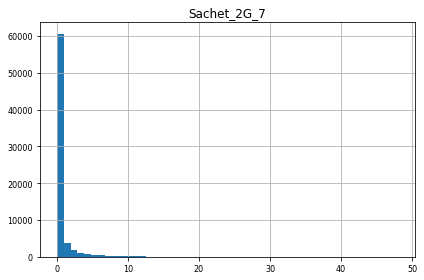

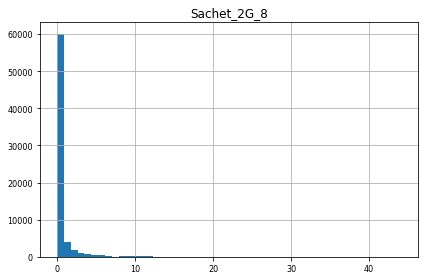

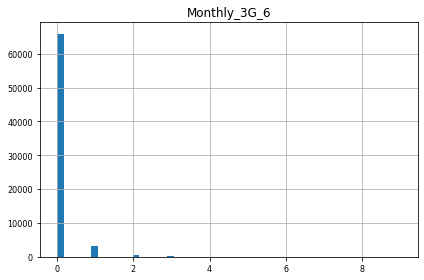

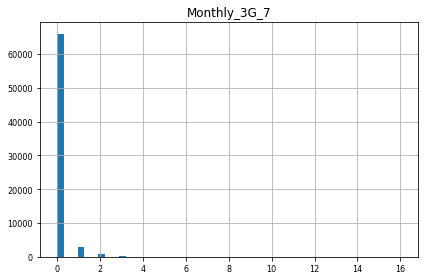

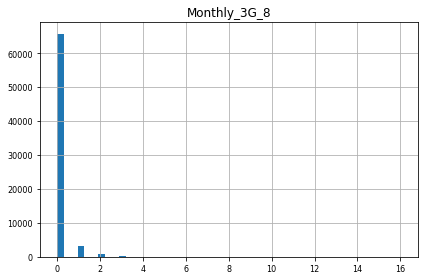

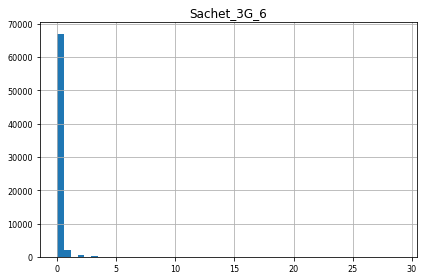

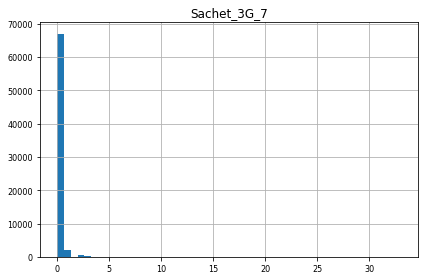

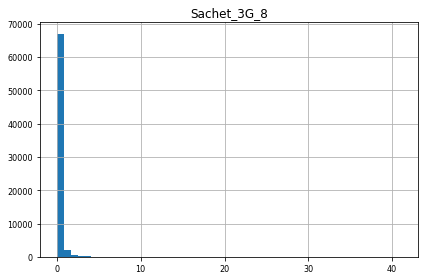

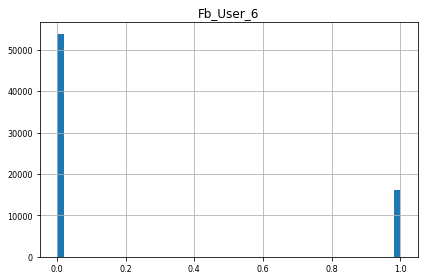

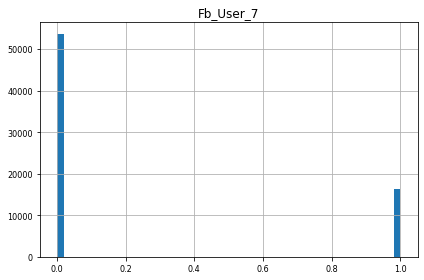

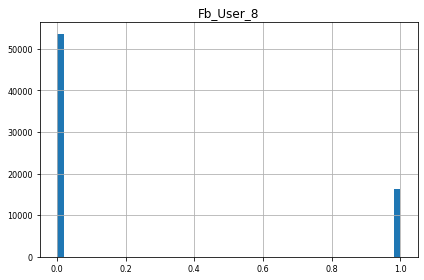

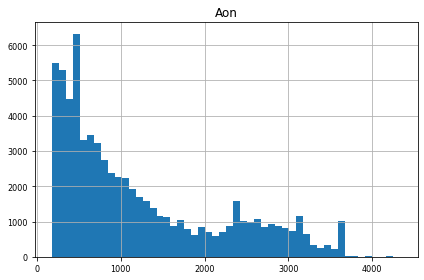

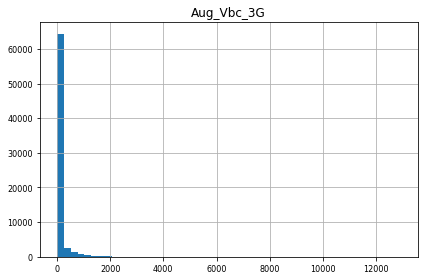

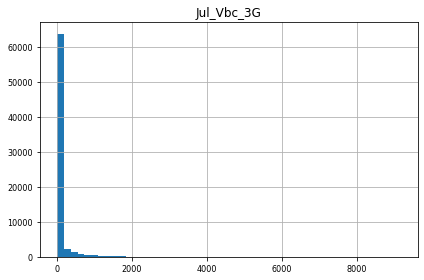

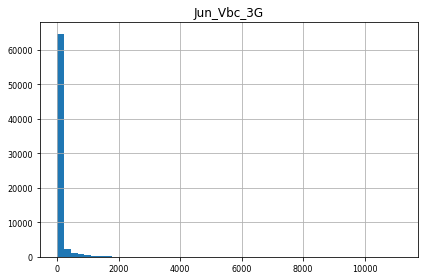

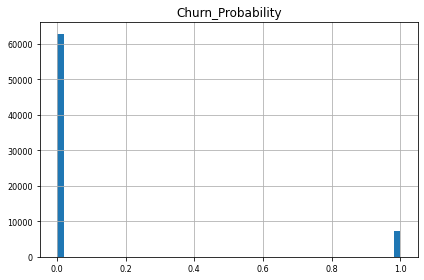

In [22]:
#Checking hist diagran of all number columns
def plotHistChart(i):
    plt.subplot(1,1,1)
    ax = data_train[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()
    
for i in data_train.select_dtypes(include=['number']):
    plotHistChart(i)



In [23]:
data_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69

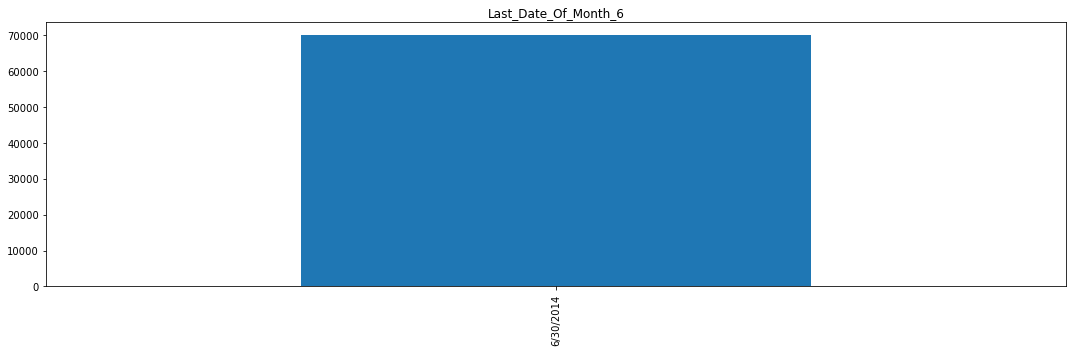

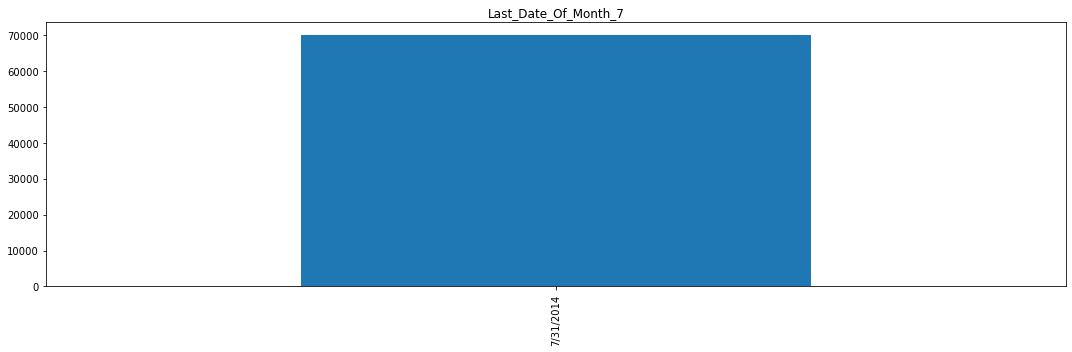

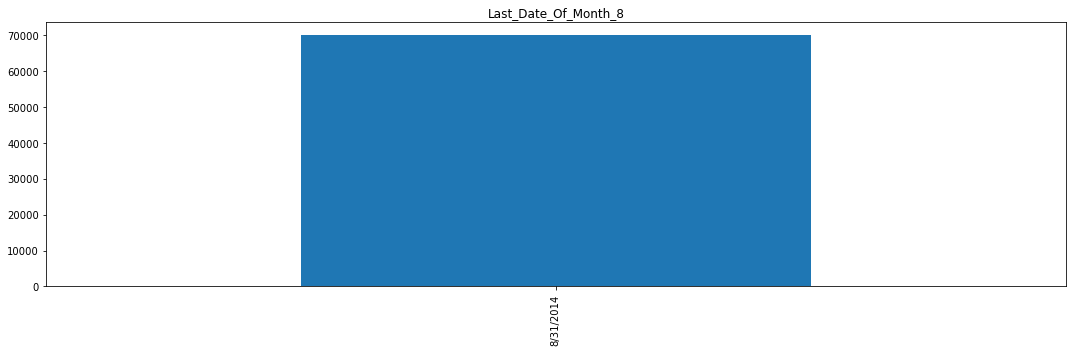

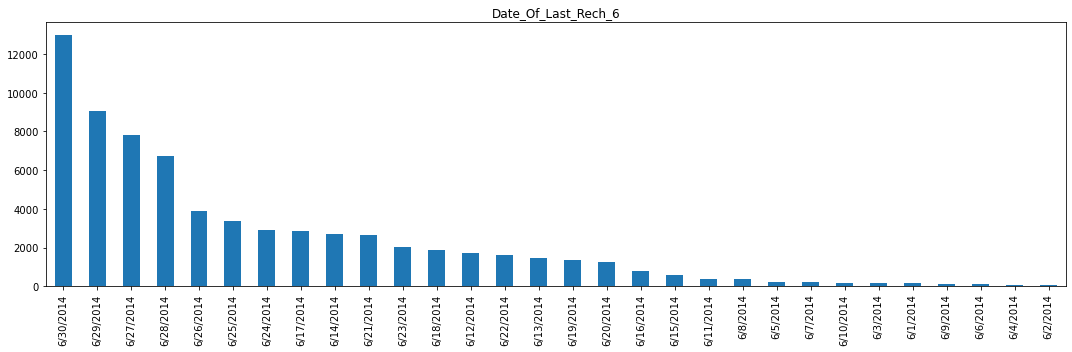

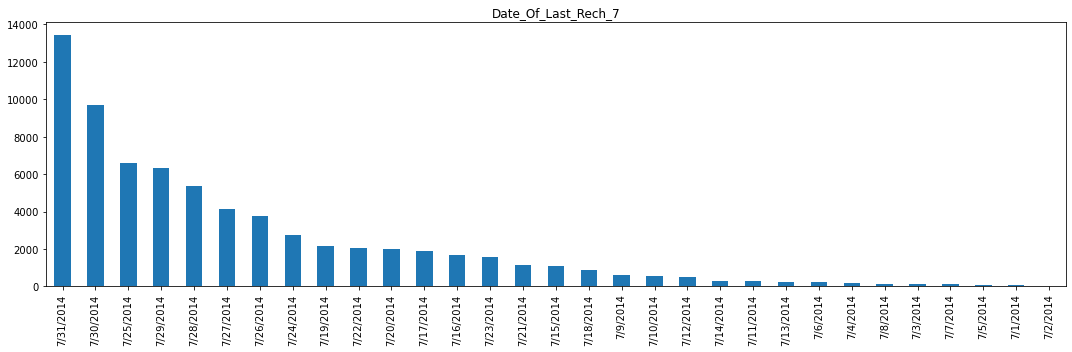

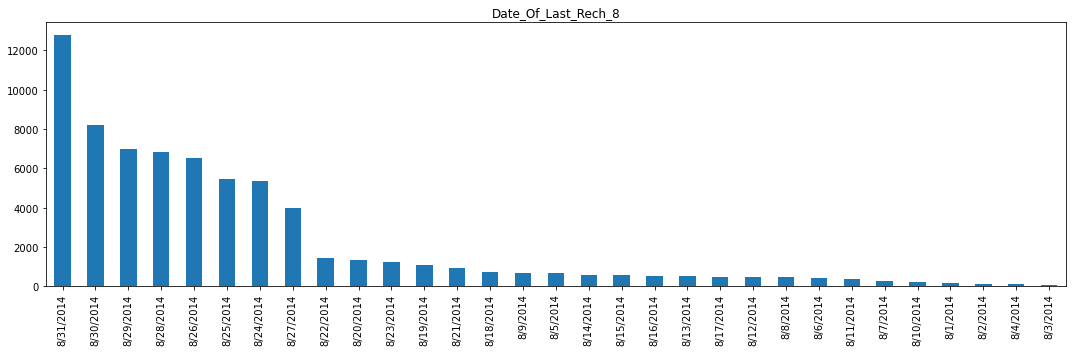

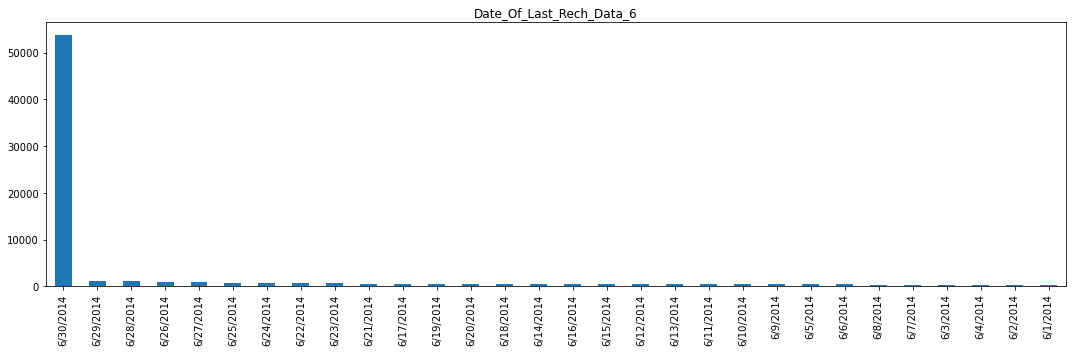

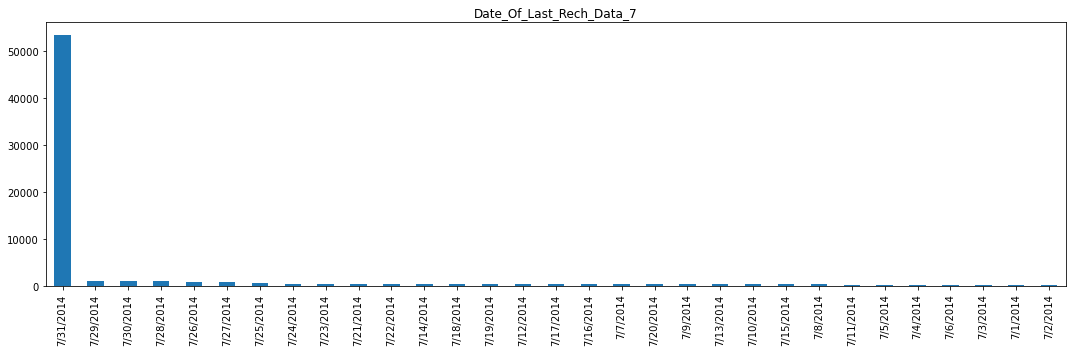

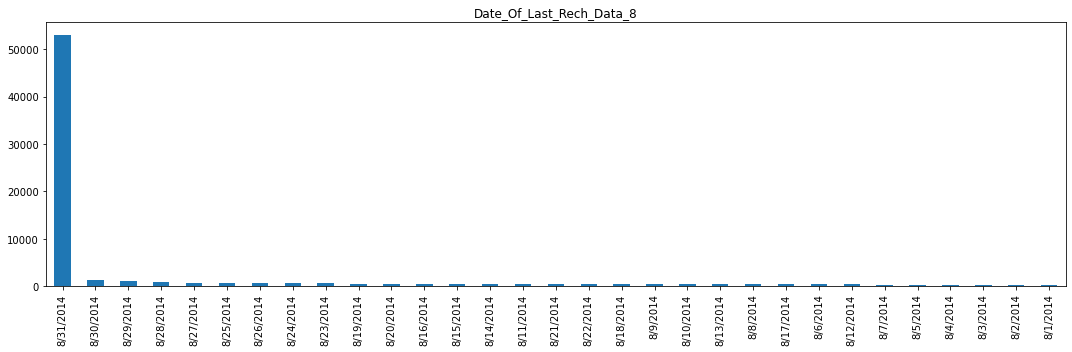

In [24]:
#Checking all Object columns bar graphs
def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,1,1)
    ax = data_train[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()

for i in data_train.select_dtypes(include=['object']):
    plotBarChart(i)

In [25]:
data_train.filter(regex='ic').filter(regex='_6').head()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,0.00,2.43,0.83,0.00,3.26,0.00,7.46,0.0,7.46,11.84,0.0,0.0,1.11
1,0.00,1.68,1.41,0.35,3.44,0.00,0.00,0.0,0.00,3.44,0.0,0.0,0.00
2,0.00,4.51,89.86,0.00,94.38,11.69,18.21,0.0,29.91,124.29,0.0,0.0,0.00
3,0.00,24.98,53.99,7.23,86.21,0.00,8.89,0.0,8.89,95.11,0.0,0.0,0.00
4,53.64,5.44,10.58,5.51,21.54,0.00,0.00,0.0,0.00,21.54,0.0,0.0,0.00


In [26]:
data_train.filter(regex='rech').filter(regex='_6').head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,3,77,65,6/22/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
1,3,0,0,6/12/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
2,2,70,70,6/11/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
3,2,160,110,6/15/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
4,13,290,50,6/25/2014,6/25/2014,7.0,25.0,7.0,0.0,175.0


In [27]:
#Calculate total recharge 
data_train['total_data_rech_amt_6'] = data_train['total_rech_data_6'] * data_train['av_rech_amt_data_6']
data_train['total_data_rech_amt_7'] = data_train['total_rech_data_7'] * data_train['av_rech_amt_data_7']
data_train['total_data_rech_amt_8'] = data_train['total_rech_data_8'] * data_train['av_rech_amt_data_8']
data_train['total_rech_6'] = data_train[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_train['total_rech_7'] = data_train[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_train['total_rech_8'] = data_train[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

drop_data_rech_columns = ['total_rech_data_6','av_rech_amt_data_6',
                         'total_rech_data_7','av_rech_amt_data_7',
                         'total_rech_data_8','av_rech_amt_data_8',
                         'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                         'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 
                         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
data_train.drop(drop_data_rech_columns,axis=1,inplace=True)

In [28]:
data_test['total_data_rech_amt_6'] = data_test['total_rech_data_6'] * data_test['av_rech_amt_data_6']
data_test['total_data_rech_amt_7'] = data_test['total_rech_data_7'] * data_test['av_rech_amt_data_7']
data_test['total_data_rech_amt_8'] = data_test['total_rech_data_8'] * data_test['av_rech_amt_data_8']
data_test['total_rech_6'] = data_test[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_test['total_rech_7'] = data_test[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_test['total_rech_8'] = data_test[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

data_test.drop(drop_data_rech_columns,axis=1,inplace=True)

In [29]:
#Calculate Roaming
data_train['roam_6'] = data_train[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_7'] = data_train[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_8'] = data_train[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

drop_roam_columns =['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
data_train.drop(drop_roam_columns,axis=1,inplace=True)

In [30]:
data_test['roam_6'] = data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_7'] = data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_8'] = data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

data_test.drop(drop_roam_columns,axis=1,inplace=True)

In [31]:
#Calculate Local
data_train['local_6'] = data_train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_7'] = data_train[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_8'] = data_train[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_loc_columns = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
                    'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                    'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                    'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                    'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
                    'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
data_train.drop(drop_loc_columns,axis=1,inplace=True)

In [32]:
data_test['local_6'] = data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_7'] = data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_8'] = data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_loc_columns,axis=1,inplace=True)

In [33]:
#Calculate STD
data_train['std_6'] = data_train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_7'] = data_train[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_8'] = data_train[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_std_columns = ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                    'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                    'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                    'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                    'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                    'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                    'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                    'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
data_train.drop(drop_std_columns,axis=1,inplace=True)

In [34]:
data_test['std_6'] = data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_7'] = data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_8'] = data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_std_columns,axis=1,inplace=True)

In [35]:
#Calculate SPL
data_train['spl_6'] = data_train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_7'] = data_train[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_8'] = data_train[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_spl_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                    'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                    'og_others_6', 'og_others_7', 'og_others_8',  
                    'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                    'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                    'ic_others_6', 'ic_others_7', 'ic_others_8']
data_train.drop(drop_spl_columns,axis=1,inplace=True)

In [36]:
data_test['spl_6'] = data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_7'] = data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_8'] = data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_spl_columns,axis=1,inplace=True)

In [37]:
#Calculate Data usage
data_train['data_used_6'] = data_train[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_train['data_used_7'] = data_train[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_train['data_used_8'] = data_train[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
drop_data_usage_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
                           'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
                           'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
data_train.drop(drop_data_usage_columns,axis=1,inplace=True)

In [38]:
data_test['data_used_6'] = data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_test['data_used_7'] = data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_test['data_used_8'] = data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

data_test.drop(drop_data_usage_columns,axis=1,inplace=True)

In [39]:
drop_others_columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                    'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                    'offnet_mou_6','offnet_mou_7','offnet_mou_8',
                    'fb_user_6','fb_user_7','fb_user_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
data_train.drop(drop_others_columns,axis=1,inplace=True)

data_test.drop(drop_others_columns,axis=1,inplace=True)

In [40]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     69999 non-null  int64  
 1   arpu_6                 69999 non-null  float64
 2   arpu_7                 69999 non-null  float64
 3   arpu_8                 69999 non-null  float64
 4   total_og_mou_6         69999 non-null  float64
 5   total_og_mou_7         69999 non-null  float64
 6   total_og_mou_8         69999 non-null  float64
 7   total_ic_mou_6         69999 non-null  float64
 8   total_ic_mou_7         69999 non-null  float64
 9   total_ic_mou_8         69999 non-null  float64
 10  total_rech_amt_6       69999 non-null  int64  
 11  total_rech_amt_7       69999 non-null  int64  
 12  total_rech_amt_8       69999 non-null  int64  
 13  last_day_rch_amt_6     69999 non-null  int64  
 14  last_day_rch_amt_7     69999 non-null  int64  
 15  la

In [41]:
data_train.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,roam_6,roam_7,roam_8,local_6,local_7,local_8,std_6,std_7,std_8,spl_6,spl_7,spl_8,data_used_6,data_used_7,data_used_8
0,0,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,40.56,77,65,10,65,65,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0,0.0,0.0,0.0,77.0,65.0,10.0,0,0,0,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
1,1,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,25.04,0,145,50,0,0,0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0,0.0,145.0,0.0,0.0,290.0,50.0,0,0,0,1,1,1,0,0,0,0,1,1,0.0,356.87,0.00
2,2,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,36.64,70,120,0,70,50,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0,0.0,0.0,0.0,70.0,120.0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
3,3,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,83.84,160,240,130,110,110,50,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0,0.0,0.0,0.0,160.0,240.0,130.0,0,0,1,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
4,4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,290,136,122,25,10,30,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0,390.8,308.89,213.47


In [42]:
X_train = data_train.drop(['churn_probability'], axis=1)
y_train = data_train['churn_probability']

X_test = data_test

In [43]:
!pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

X_tr = data_train.drop(['churn_probability'], axis=1)
y_tr = pd.DataFrame(data_train['churn_probability'])


sm = SMOTE(random_state=42,sampling_strategy='all')
X_train,y_train = sm.fit_resample(X_tr,y_tr)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(125734, 59)
(125734, 1)
(30000, 59)


In [45]:
#Scaling 
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [46]:
X_train.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,roam_6,roam_7,roam_8,local_6,local_7,local_8,std_6,std_7,std_8,spl_6,spl_7,spl_8,data_used_6,data_used_7,data_used_8
0,-1.727973,-0.769848,-0.491018,-0.624596,-0.495255,-0.111733,-0.497420,-0.585946,-0.375656,-0.351582,-0.634214,-0.558839,-0.586132,0.076355,0.194958,-0.481589,-0.207652,-0.199744,-0.188386,-0.229189,-0.210351,-0.196783,-0.08888,-0.074807,-0.062369,-0.205881,-0.206345,-0.200107,-0.236475,-0.229460,-0.214529,-0.176489,-0.16692,-0.164446,-0.117211,-0.108731,-0.097854,1.052093,-0.195167,-0.180641,-0.147762,-0.466599,-0.390397,-0.366581,-0.450428,-0.419781,-0.440568,0.484129,0.604236,0.824617,0.677311,0.809997,1.014920,0.926693,1.065241,1.234471,-0.278358,-0.271791,-0.250193
1,-1.727923,-0.864530,-0.378123,-0.508152,-0.662486,-0.523203,-0.428220,-0.618039,-0.429035,-0.416917,-0.828787,-0.348099,-0.476896,-0.659451,-0.563769,-0.481589,-0.207652,1.150667,-0.188386,-0.229189,1.247027,-0.196783,-0.08888,-0.074807,-0.062369,-0.205881,-0.206345,-0.200107,-0.236475,-0.229460,-0.214529,-0.176489,3.12885,-0.164446,-0.117211,-0.108731,-0.097854,-0.379631,-0.195167,0.023916,-0.147762,-0.562379,-0.132327,-0.320951,-0.450428,-0.419781,-0.440568,0.484129,0.604236,0.824617,-1.476428,-1.234573,-0.985299,-1.079106,1.065241,1.234471,-0.278358,0.257153,-0.250193
2,-1.727874,-0.680457,-0.440004,-0.649336,-0.546159,-0.375315,-0.506381,-0.156324,-0.451054,-0.368084,-0.651903,-0.413956,-0.613441,0.132956,0.019867,-0.481589,-0.207652,-0.199744,-0.188386,-0.229189,-0.210351,-0.196783,-0.08888,-0.074807,-0.062369,-0.205881,-0.206345,-0.200107,-0.236475,-0.229460,-0.214529,-0.176489,-0.16692,-0.164446,-0.117211,-0.108731,-0.097854,-0.182310,-0.195167,-0.180641,-0.147762,-0.475307,-0.327314,-0.377989,-0.450428,-0.419781,-0.440568,0.484129,0.604236,0.824617,0.677311,0.809997,1.014920,0.926693,1.065241,1.234471,-0.278358,-0.271791,-0.250193
3,-1.727824,-0.391190,-0.117885,-0.284171,-0.505922,-0.382599,-0.373462,-0.267808,-0.386882,-0.169384,-0.424480,-0.097846,-0.258425,0.585760,0.720230,0.092154,-0.207652,-0.199744,-0.188386,-0.229189,-0.210351,-0.196783,-0.08888,-0.074807,-0.062369,-0.205881,-0.206345,-0.200107,-0.236475,-0.229460,-0.214529,-0.176489,-0.16692,-0.164446,-0.117211,-0.108731,-0.097854,-0.067589,-0.195167,-0.180641,-0.147762,-0.363357,-0.189676,-0.229691,-0.450428,-0.419781,2.269796,0.484129,0.604236,0.824617,0.677311,0.809997,1.014920,0.926693,1.065241,1.234471,-0.278358,-0.271791,-0.250193
4,-1.727775,-0.135857,-0.361071,-0.315496,-0.532218,-0.496892,-0.467473,-0.548887,-0.547096,-0.403151,-0.095981,-0.371808,-0.280272,-0.376448,-0.447042,-0.137343,-0.207652,0.187447,-0.188386,-0.229189,0.208908,-0.196783,-0.08888,-0.074807,-0.062369,-0.205881,-0.206345,-0.200107,5.063783,4.049613,4.518933,-0.176489,-0.16692,-0.164446,-0.117211,1.836798,-0.097854,-0.451906,1.734091,1.705514,1.033266,1.322111,1.224550,0.733104,2.220111,-0.419781,-0.440568,0.484129,0.604236,0.824617,0.677311,-1.234573,-0.985299,-1.079106,1.065241,-0.810064,0.281607,0.186039,0.081462


In [47]:
#PCA

pca = PCA(random_state=42)

In [48]:
pca.fit(X_train)

PCA(random_state=42)

In [49]:
pca.components_

array([[ 2.13374537e-03,  1.51159998e-01,  1.88069280e-01, ...,
         1.76245832e-01,  1.97799521e-01,  1.96799073e-01],
       [ 6.94326902e-04,  1.25695174e-01,  1.79538373e-01, ...,
        -1.49058490e-01, -1.41812768e-01, -1.24099348e-01],
       [ 3.08823721e-03, -1.43142578e-01, -1.07017455e-01, ...,
        -4.42709608e-02, -2.90963888e-02, -1.58566478e-02],
       ...,
       [-4.29612209e-07, -2.87711300e-05,  1.36322273e-05, ...,
         3.12112627e-06,  1.49997971e-05, -5.36029011e-06],
       [-7.95039292e-07,  1.33662720e-05, -1.71727308e-05, ...,
         2.70903192e-06, -2.95638028e-06,  4.12201379e-07],
       [ 1.18611251e-06, -2.45956605e-06, -2.36312755e-06, ...,
        -3.45854378e-06,  9.33238121e-07,  1.86336705e-06]])

In [50]:
pca.explained_variance_ratio_

array([2.04111287e-01, 1.11703692e-01, 6.74480685e-02, 5.85332029e-02,
       4.51742692e-02, 3.72925629e-02, 3.28118721e-02, 3.16183205e-02,
       2.99472821e-02, 2.85522713e-02, 2.64266492e-02, 2.30143199e-02,
       2.01323975e-02, 1.70294370e-02, 1.63652602e-02, 1.53073117e-02,
       1.49199938e-02, 1.31888337e-02, 1.26700585e-02, 1.22455002e-02,
       1.16818754e-02, 1.10501674e-02, 1.07090103e-02, 9.64935470e-03,
       9.49544302e-03, 9.09676537e-03, 8.98608229e-03, 8.90088718e-03,
       8.67420737e-03, 7.67300515e-03, 7.40296711e-03, 7.17839533e-03,
       6.96857040e-03, 6.45830239e-03, 6.27689892e-03, 5.58733642e-03,
       5.33811761e-03, 4.52457329e-03, 4.30523327e-03, 3.64389594e-03,
       3.15087933e-03, 2.89222520e-03, 2.72047663e-03, 2.55166991e-03,
       2.51554107e-03, 2.34766421e-03, 2.17687524e-03, 1.88473927e-03,
       1.66930362e-03, 1.42013640e-03, 1.27197075e-03, 8.78020817e-04,
       7.71256684e-04, 6.78787065e-04, 5.40647026e-04, 4.36125084e-04,
      

In [51]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

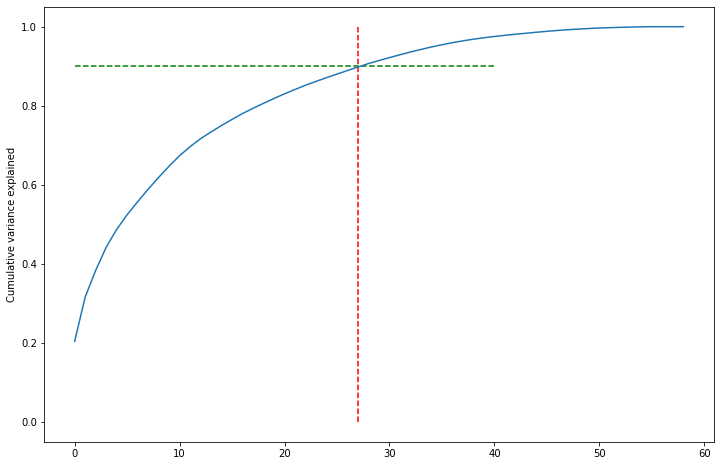

In [77]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [78]:
from sklearn.decomposition import IncrementalPCA

In [80]:
pca_final = IncrementalPCA(n_components=27)

In [81]:
df_train_pca = pca_final.fit_transform(X_train)

In [82]:
df_train_pca.shape

(125734, 27)

In [83]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [84]:
corrmat.shape

(27, 27)

<AxesSubplot:>

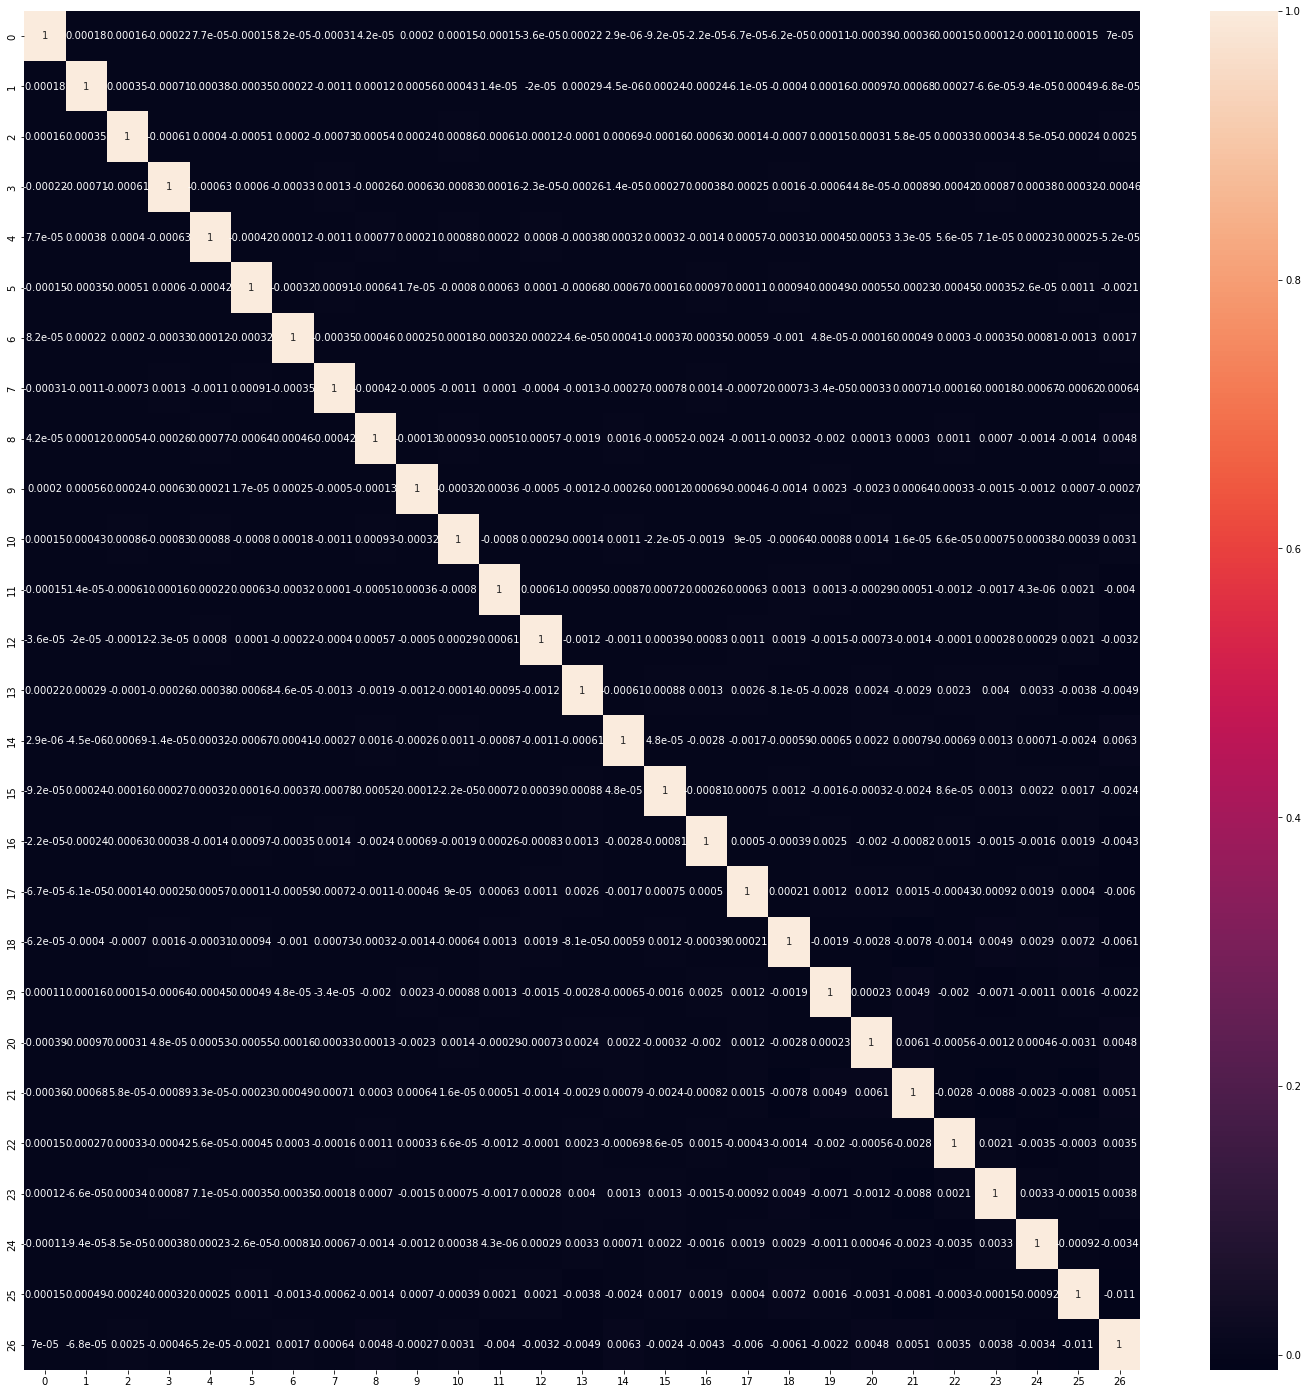

In [85]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [86]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 27)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
learner_pca = LogisticRegression()

In [89]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [90]:
round(model_pca.score(df_train_pca, y_train) * 100, 2)

89.66

In [91]:
y_pred = learner_pca.predict_proba(df_train_pca)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_df.head()

,1
0,0.042396
1,0.276775
2,0.076633
3,0.144526
4,0.172093


In [92]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn_probability
0,0
1,0
2,0
3,0
4,0


In [93]:
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn_probability,Churn_Prob
0,0,0.042396
1,0,0.276775
2,0,0.076633
3,0,0.144526
4,0,0.172093


In [94]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted
0,0,0.042396,0
1,0,0.276775,0
2,0,0.076633,0
3,0,0.144526,0
4,0,0.172093,0


In [95]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.042396,0,1,0,0,0,0,0,0,0,0,0
1,0,0.276775,0,1,1,1,0,0,0,0,0,0,0
2,0,0.076633,0,1,0,0,0,0,0,0,0,0,0
3,0,0.144526,0,1,1,0,0,0,0,0,0,0,0
4,0,0.172093,0,1,1,0,0,0,0,0,0,0,0


In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
def print_score(y_pred_final):
    metric = []
    '''
    print the accuracy score and confusion matrix
    '''
    '''
    training performance
    '''
    print("Train Result:\n")
    acc_score = round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100
    metric.append(acc_score)
    print("accuracy score: {0:.4f}\n".format(acc_score))
    confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.Predicted)
    print("Confusion Matrix: \n {}\n".format(confusion))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = round(TP / float(TP+FN), 4) * 100
    print("Sensitivity: {0:.4f}\n".format(sensitivity))
    metric.append(sensitivity)

    specificity = round(TN / float(TN+FP), 4) * 100
    print("Specificity: {0:.4f}\n".format(specificity))
    metric.append(specificity)
    
    fpr = round(FP/ float(TN+FP), 4) * 100
    print("False Positive Rate : {0:.4f}\n".format(fpr))    
    metric.append(fpr)
    
    ppv= round(TP / float(TP+FP), 4)* 100
    print("Positive Predictive Value : {0:.4f}\n".format(ppv))
    metric.append(ppv)
    
    npv= round(TN / float(TN+ FN), 4) * 100
    print("Negative Predictive Value : {0:.4f}\n".format(npv))
    metric.append(npv)
    
    precision = round(TP / float(TP+ FP), 4) * 100
    print("Precision : {0:.4f}\n".format(precision))
    metric.append(precision)
    
    recall = round(TP / float(TP+ FN), 4) * 100
    print("Recall : {0:.4f}\n".format(recall))
    metric.append(recall)

    
    return metric

In [98]:
def print_cutoffmatrix(y_pred_final):
    cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final[i] )
        total1=sum(sum(cm))
        Accuracy = (cm[0,0] + cm[1,1]) / total1
        Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
        Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
        Precision = precision_score(y_pred_final.churn_probability, y_pred_final[i])
        Recall = recall_score(y_pred_final.churn_probability, y_pred_final[i])
        cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

    print(cutoffmatrix_df)

    cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
    plt.show()

Train Result:

accuracy score: 89.6600

Confusion Matrix: 
 [[57481  5386]
 [ 7616 55251]]

Sensitivity: 87.8900

Specificity: 91.4300

False Positive Rate : 8.5700

Positive Predictive Value : 91.1200

Negative Predictive Value : 88.3000

Precision : 91.1200

Recall : 87.8900



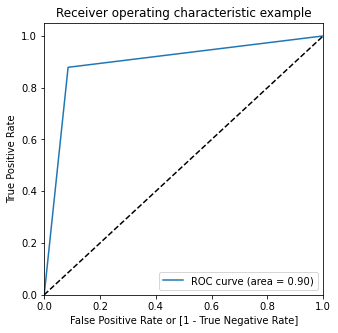

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.779232     0.971432     0.587033   0.701699  0.971432
0.2          0.2  0.844871     0.945711     0.744031   0.786991  0.945711
0.3          0.3  0.874346     0.923426     0.825266   0.840885  0.923426
0.4          0.4  0.889879     0.900631     0.879126   0.881671  0.900631
0.5          0.5  0.896591     0.878855     0.914327   0.911176  0.878855
0.6          0.6  0.896846     0.856618     0.937074   0.931568  0.856618
0.7          0.7  0.891581     0.828591     0.954571   0.948023  0.828591
0.8          0.8  0.880192     0.790717     0.969666   0.963055  0.790717
0.9          0.9  0.838938     0.695802     0.982073   0.974883  0.695802


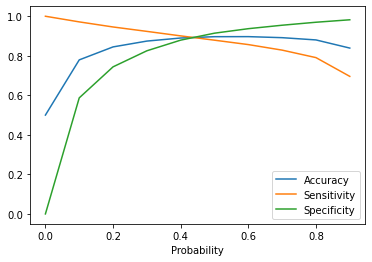

In [99]:
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [100]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,churn_probability,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.042396,0,1,0,0,0,0,0,0,0,0,0
1,0,0.276775,0,1,1,1,0,0,0,0,0,0,0
2,0,0.076633,0,1,0,0,0,0,0,0,0,0,0
3,0,0.144526,0,1,1,0,0,0,0,0,0,0,0
4,0,0.172093,0,1,1,0,0,0,0,0,0,0,0


In [101]:
metric_pca = print_score(y_pred_final)

Train Result:

accuracy score: 89.2100

Confusion Matrix: 
 [[55826  7041]
 [ 6531 56336]]

Sensitivity: 89.6100

Specificity: 88.8000

False Positive Rate : 11.2000

Positive Predictive Value : 88.8900

Negative Predictive Value : 89.5300

Precision : 88.8900

Recall : 89.6100



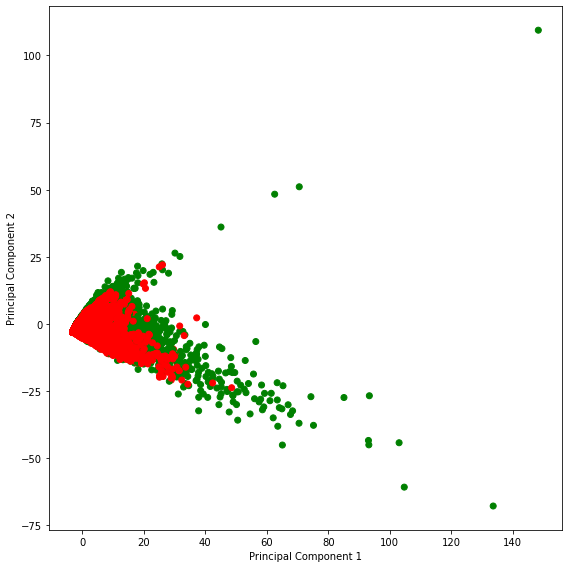

In [108]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train['churn_probability'].map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [115]:
y_test_pred = model_pca.predict_proba(df_test_pca)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,1.0,1
1,70000,1.0,1
2,70001,1.0,1
3,70002,1.0,1
4,70003,1.0,1


In [112]:
y_test_final_pca = y_test_pred_final[['id','churn_probability']]
y_test_final_pca.to_csv('submission_pca.csv',index=False)

In [114]:
y_test_final_pca['churn_probability'].sum()

28235

In [ ]:
#PCA Again

In [116]:
pca_again = PCA(0.9)

In [117]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [118]:
df_train_pca2.shape

(125734, 29)

In [119]:
learner_pca2 = LogisticRegression()

In [120]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [121]:
round(model_pca2.score(df_train_pca2, y_train) * 100, 2)

89.91

In [122]:
df_test_pca2 = pca_again.transform(X_test)

In [123]:
df_test_pca2.shape

(30000, 29)

Train Result:

accuracy score: 89.9100

Confusion Matrix: 
 [[57583  5284]
 [ 7400 55467]]

Sensitivity: 88.2300

Specificity: 91.5900

False Positive Rate : 8.4100

Positive Predictive Value : 91.3000

Negative Predictive Value : 88.6100

Precision : 91.3000

Recall : 88.2300



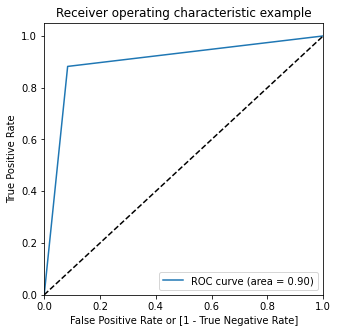

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.786191     0.971161     0.601222   0.708908  0.971161
0.2          0.2  0.848840     0.946983     0.750696   0.791602  0.946983
0.3          0.3  0.878863     0.925271     0.832456   0.846686  0.925271
0.4          0.4  0.893354     0.902731     0.883977   0.886113  0.902731
0.5          0.5  0.899120     0.882291     0.915950   0.913022  0.882291
0.6          0.6  0.899057     0.860945     0.937169   0.931985  0.860945
0.7          0.7  0.894205     0.833808     0.954603   0.948365  0.833808
0.8          0.8  0.881989     0.793835     0.970143   0.963753  0.793835
0.9          0.9  0.841483     0.700638     0.982328   0.975397  0.700638


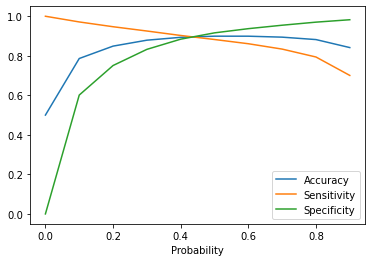

In [124]:
y_pred = learner_pca2.predict_proba(df_train_pca2)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [125]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
print(y_pred_final.head())
metric_pca2 = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.036843          0    1    0    0    0    0    0   
1                  0    0.361523          0    1    1    1    1    0    0   
2                  0    0.067882          0    1    0    0    0    0    0   
3                  0    0.169599          0    1    1    0    0    0    0   
4                  0    0.337126          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 89.5000

Confusion Matrix: 
 [[56043  6824]
 [ 6373 56494]]

Sensitivity: 89.8600

Specificity: 89.1500

False Positive Rate : 10.8500

Positive Predictive Value : 89.2200

Negative Predictive Value : 89.7900

Precision : 89.2200

Recall : 89.8600



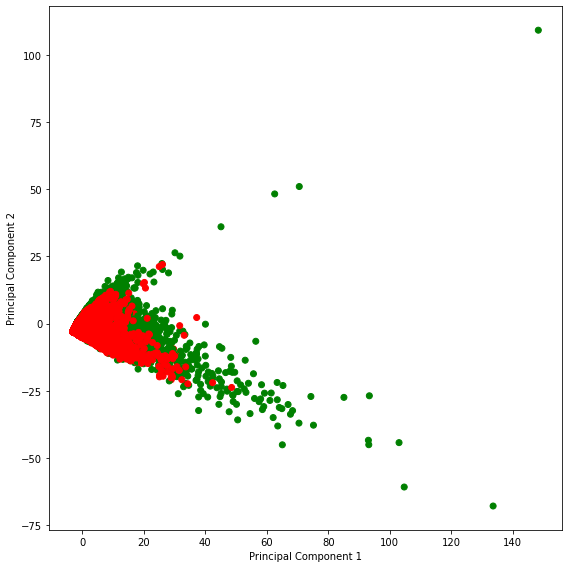

In [126]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train['churn_probability'].map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [127]:
y_test_pred = model_pca2.predict_proba(df_test_pca2)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,1.0,1
1,70000,1.0,1
2,70001,1.0,1
3,70002,1.0,1
4,70003,1.0,1


In [128]:
y_test_final_pca2 = y_test_pred_final[['id','churn_probability']]
y_test_final_pca2.to_csv('submission_pca2.csv',index=False)
#.76%

In [129]:
y_test_final_pca2['churn_probability'].sum()

25030

In [150]:
def print_classification_score(clf, X_train, y_train,train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        #res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        #print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
 

In [131]:
#Decision Tree

In [132]:
clf = DecisionTreeClassifier(random_state=42,max_depth=5)

In [133]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [134]:
print_classification_score(clf, X_train, y_train,True)

Train Result:

accuracy score: 0.8960

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     62867
           1       0.92      0.86      0.89     62867

    accuracy                           0.90    125734
   macro avg       0.90      0.90      0.90    125734
weighted avg       0.90      0.90      0.90    125734


Confusion Matrix: 
 [[58455  4412]
 [ 8665 54202]]

Average Accuracy: 	 0.7106
Accuracy SD: 		 0.2420


Train Result:

accuracy score: 89.6000

Confusion Matrix: 
 [[58455  4412]
 [ 8665 54202]]

Sensitivity: 86.2200

Specificity: 92.9800

False Positive Rate : 7.0200

Positive Predictive Value : 92.4700

Negative Predictive Value : 87.0900

Precision : 92.4700

Recall : 86.2200



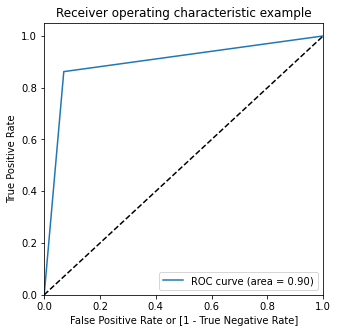

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.815348     0.943420     0.687276   0.751045  0.943420
0.2          0.2  0.855449     0.925541     0.785356   0.811747  0.925541
0.3          0.3  0.881488     0.900997     0.861978   0.867162  0.900997
0.4          0.4  0.895995     0.863028     0.928961   0.923947  0.863028
0.5          0.5  0.895995     0.862169     0.929820   0.924728  0.862169
0.6          0.6  0.894468     0.838834     0.950101   0.943854  0.838834
0.7          0.7  0.882697     0.786804     0.978590   0.973509  0.786804
0.8          0.8  0.877495     0.771709     0.983282   0.978796  0.771709
0.9          0.9  0.874855     0.765250     0.984459   0.980096  0.765250


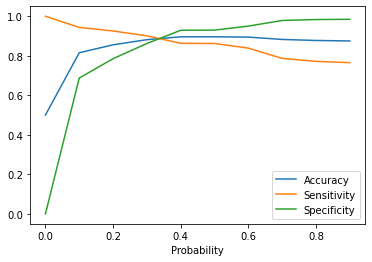

In [135]:
y_pred = clf.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [136]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
print(y_pred_final.head())
metric_dt = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.237851          0    1    1    1    0    0    0   
1                  0    0.237851          0    1    1    1    0    0    0   
2                  0    0.237851          0    1    1    1    0    0    0   
3                  0    0.540759          1    1    1    1    1    1    1   
4                  0    0.347185          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 89.0700

Confusion Matrix: 
 [[56672  6195]
 [ 7547 55320]]

Sensitivity: 88.0000

Specificity: 90.1500

False Positive Rate : 9.8500

Positive Predictive Value : 89.9300

Negative Predictive Value : 88.2500

Precision : 89.9300

Recall : 88.0000



In [140]:
y_test_pred = clf.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,0.093177,0
1,70000,0.093177,0
2,70001,0.121290,0
3,70002,0.093177,0
4,70003,0.022090,0


In [143]:
y_test_final_dt = y_test_pred_final[['id','churn_probability']]
y_test_final_dt.to_csv('submission_dt.csv',index=False)
#.76%

In [144]:
y_test_final_dt['churn_probability'].sum()

0

In [145]:
#bagging classifier

In [146]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [147]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [151]:
print_classification_score(bag_clf, X_train, y_train,True)

Train Result:

accuracy score: 0.9081

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     62867
           1       0.96      0.86      0.90     62867

    accuracy                           0.91    125734
   macro avg       0.91      0.91      0.91    125734
weighted avg       0.91      0.91      0.91    125734


Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]



Train Result:

accuracy score: 90.8100

Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]

Sensitivity: 85.5700

Specificity: 96.0500

False Positive Rate : 3.9500

Positive Predictive Value : 95.5900

Negative Predictive Value : 86.9400

Precision : 95.5900

Recall : 85.5700



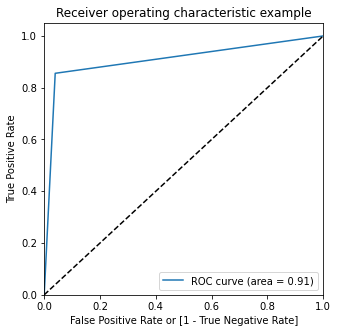

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.712767     0.978781     0.446753   0.638879  0.978781
0.2          0.2  0.864420     0.933526     0.795314   0.820169  0.933526
0.3          0.3  0.896854     0.909491     0.884216   0.887070  0.909491
0.4          0.4  0.907193     0.888304     0.926082   0.923180  0.888304
0.5          0.5  0.908116     0.855695     0.960536   0.955914  0.855695
0.6          0.6  0.896003     0.818156     0.973850   0.969027  0.818156
0.7          0.7  0.883436     0.788251     0.978622   0.973595  0.788251
0.8          0.8  0.880899     0.782127     0.979671   0.974667  0.782127
0.9          0.9  0.858320     0.727043     0.989597   0.985893  0.727043


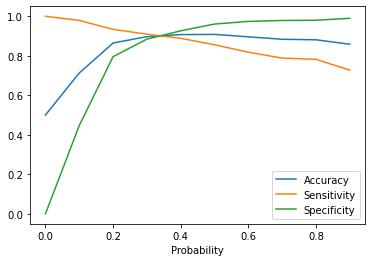

In [152]:
y_pred = bag_clf.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [153]:
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
print(y_pred_final.head())
metric_bag_clf = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.168544          0    1    1    0    0    0    0   
1                  0    0.169258          0    1    1    0    0    0    0   
2                  0    0.169117          0    1    1    0    0    0    0   
3                  0    0.454648          1    1    1    1    1    1    0   
4                  0    0.317054          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 90.5800

Confusion Matrix: 
 [[57790  5077]
 [ 6768 56099]]

Sensitivity: 89.2300

Specificity: 91.9200

False Positive Rate : 8.0800

Positive Predictive Value : 91.7000

Negative Predictive Value : 89.5200

Precision : 91.7000

Recall : 89.2300



In [154]:
y_test_pred = bag_clf.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,0.081822,0
1,70000,0.081822,0
2,70001,0.338025,0
3,70002,0.081822,0
4,70003,0.028709,0


In [155]:
y_test_final_bag_clf = y_test_pred_final[['id','churn_probability']]
y_test_final_bag_clf.to_csv('submission_bag_clf.csv',index=False)
#.76%

In [156]:
y_test_final_bag_clf['churn_probability'].sum()

0

In [157]:
#oob_score=True
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [158]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=42),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [159]:
bag_clf.oob_score_

0.9052841713458571

In [160]:
print_classification_score(bag_clf, X_train, y_train,train=True)

Train Result:

accuracy score: 0.9081

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     62867
           1       0.96      0.86      0.90     62867

    accuracy                           0.91    125734
   macro avg       0.91      0.91      0.91    125734
weighted avg       0.91      0.91      0.91    125734


Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]



Train Result:

accuracy score: 90.8100

Confusion Matrix: 
 [[60386  2481]
 [ 9072 53795]]

Sensitivity: 85.5700

Specificity: 96.0500

False Positive Rate : 3.9500

Positive Predictive Value : 95.5900

Negative Predictive Value : 86.9400

Precision : 95.5900

Recall : 85.5700



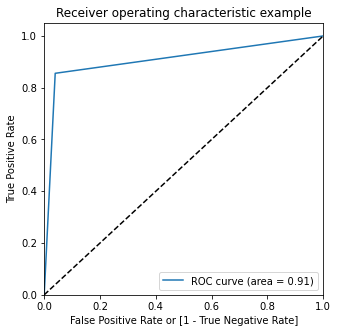

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.712767     0.978781     0.446753   0.638879  0.978781
0.2          0.2  0.864420     0.933526     0.795314   0.820169  0.933526
0.3          0.3  0.896854     0.909491     0.884216   0.887070  0.909491
0.4          0.4  0.907193     0.888304     0.926082   0.923180  0.888304
0.5          0.5  0.908116     0.855695     0.960536   0.955914  0.855695
0.6          0.6  0.896003     0.818156     0.973850   0.969027  0.818156
0.7          0.7  0.883436     0.788251     0.978622   0.973595  0.788251
0.8          0.8  0.880899     0.782127     0.979671   0.974667  0.782127
0.9          0.9  0.858320     0.727043     0.989597   0.985893  0.727043


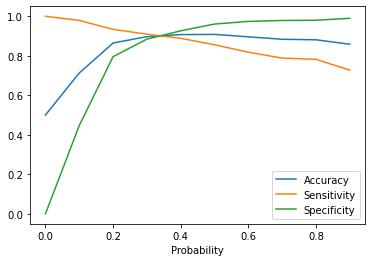

In [162]:
y_pred = bag_clf.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [163]:
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
print(y_pred_final.head())
metric_bag_clf_oob = print_score(y_pred_final)

   churn_probability  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0    0.168544          0    1    1    0    0    0    0   
1                  0    0.169258          0    1    1    0    0    0    0   
2                  0    0.169117          0    1    1    0    0    0    0   
3                  0    0.454648          1    1    1    1    1    1    0   
4                  0    0.317054          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
Train Result:

accuracy score: 90.5800

Confusion Matrix: 
 [[57790  5077]
 [ 6768 56099]]

Sensitivity: 89.2300

Specificity: 91.9200

False Positive Rate : 8.0800

Positive Predictive Value : 91.7000

Negative Predictive Value : 89.5200

Precision : 91.7000

Recall : 89.2300



In [164]:
y_test_pred = bag_clf.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,0.081822,0
1,70000,0.081822,0
2,70001,0.338025,0
3,70002,0.081822,0
4,70003,0.028709,0


In [165]:
y_test_final_bag_clf_oob = y_test_pred_final[['id','churn_probability']]
y_test_final_bag_clf_oob.to_csv('submission_bag_clf_oob.csv',index=False)
#.76%

In [166]:
y_test_final_bag_clf_oob['churn_probability'].sum()

0

In [167]:
#XGBoost

In [168]:
!pip install xgboost

In [169]:
import xgboost as xgb

In [170]:
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3,
                            n_jobs=-1, verbosity=1, gpu_id=0)

In [171]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [173]:
print_classification_score(xgb_clf, X_train, y_train,train=True)

Train Result:

accuracy score: 0.9975

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     62867

    accuracy                           1.00    125734
   macro avg       1.00      1.00      1.00    125734
weighted avg       1.00      1.00      1.00    125734


Confusion Matrix: 
 [[62708   159]
 [  152 62715]]



Train Result:

accuracy score: 99.7500

Confusion Matrix: 
 [[62708   159]
 [  152 62715]]

Sensitivity: 99.7600

Specificity: 99.7500

False Positive Rate : 0.2500

Positive Predictive Value : 99.7500

Negative Predictive Value : 99.7600

Precision : 99.7500

Recall : 99.7600



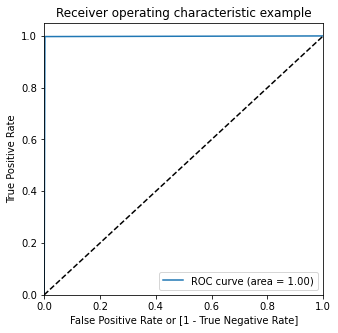

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.980538     0.999968     0.961108   0.962563  0.999968
0.2          0.2  0.992428     0.999745     0.985111   0.985326  0.999745
0.3          0.3  0.995832     0.999411     0.992253   0.992309  0.999411
0.4          0.4  0.997256     0.998871     0.995642   0.995656  0.998871
0.5          0.5  0.997527     0.997582     0.997471   0.997471  0.997582
0.6          0.6  0.996866     0.995133     0.998600   0.998595  0.995133
0.7          0.7  0.994870     0.990377     0.999364   0.999358  0.990377
0.8          0.8  0.989343     0.979003     0.999682   0.999675  0.979003
0.9          0.9  0.973945     0.947954     0.999936   0.999933  0.947954


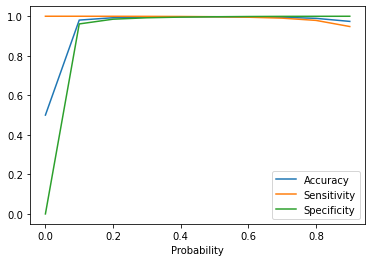

In [174]:
y_pred = xgb_clf.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [180]:
## 0.38 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
metric_xgb = print_score(y_pred_final)

Train Result:

accuracy score: 98.0500

Confusion Matrix: 
 [[60422  2445]
 [    2 62865]]

Sensitivity: 100.0000

Specificity: 96.1100

False Positive Rate : 3.8900

Positive Predictive Value : 96.2600

Negative Predictive Value : 100.0000

Precision : 96.2600

Recall : 100.0000



In [181]:
y_test_pred = xgb_clf.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [182]:
y_test_final_xgb = y_test_pred_final[['id','churn_probability']]
y_test_final_xgb.to_csv('submission_xgb.csv',index=False)

In [183]:
y_test_final_xgb['churn_probability'].sum()
#9.0013

24145

In [184]:
#Logistic Regression

In [185]:
logreg= LogisticRegression()

In [210]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg,step=20)
rfe = rfe.fit(X_train, y_train)

In [211]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 3),
 ('arpu_6', False, 2),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('total_og_mou_6', False, 3),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 3),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_amt_6', True, 1),
 ('total_rech_amt_7', True, 1),
 ('total_rech_amt_8', True, 1),
 ('last_day_rch_amt_6', False, 3),
 ('last_day_rch_amt_7', False, 3),
 ('last_day_rch_amt_8', True, 1),
 ('arpu_3g_6', False, 3),
 ('arpu_3g_7', False, 3),
 ('arpu_3g_8', False, 3),
 ('arpu_2g_6', False, 2),
 ('arpu_2g_7', False, 2),
 ('arpu_2g_8', False, 3),
 ('night_pck_user_6', False, 3),
 ('night_pck_user_7', False, 3),
 ('night_pck_user_8', False, 3),
 ('monthly_2g_6', False, 2),
 ('monthly_2g_7', False, 2),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 3),
 ('sachet_2g_7', False, 3),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', True, 1),
 ('monthly_3g_7', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_6', False, 

In [212]:
col = X_train.columns[rfe.support_]

print(col)

Index(['arpu_7', 'arpu_8', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_rech_6',
       'total_rech_7', 'total_rech_8', 'roam_7', 'roam_8', 'local_6',
       'local_7', 'local_8', 'spl_8'],
      dtype='object')


In [213]:
X_train_sm = smt.add_constant(X_train[col])
X_test_sm = smt.add_constant(X_test[col])
logm2 = smt.GLM(y_train,X_train_sm, family = smt.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125704
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13052.
Date:                Wed, 11 May 2022   Deviance:                       26105.
Time:                        00:05:51   Pearson chi2:                 5.26e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.655e+

In [214]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,total_rech_8,15729353.02
21,total_rech_7,14319160.06
20,total_rech_6,12075349.54
19,total_data_rech_amt_8,10652578.94
18,total_data_rech_amt_7,9465359.31
17,total_data_rech_amt_6,7532772.44
6,total_rech_amt_6,2926285.25
8,total_rech_amt_8,2744575.72
7,total_rech_amt_7,2714870.03
1,arpu_8,17.49


In [215]:
#function to generate model and VIF details

def generateModel(X,field):
    X_train_new = X.drop(field,axis=1)
    # create another model
    X_train_lm = smt.add_constant(X_train_new)
    #create model
    logm2 = smt.GLM(y_train,X_train_lm, family = smt.families.Binomial())
    lr_model = logm2.fit()
    #params
    print(lr_model.summary())
    #Calculate the VIFs for the new model    
    vif = pd.DataFrame()
    X_vif = X_train_new;
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    print(vif)
    return X_train_new,X_train_lm,lr_model

In [216]:
X_train_sm.drop('const',axis=1,inplace=True)
X_train_new,X_train_lm,lr_model = generateModel(X_train_sm,'arpu_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125705
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13057.
Date:                Wed, 11 May 2022   Deviance:                       26115.
Time:                        00:06:50   Pearson chi2:                 1.04e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.663e+

In [217]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'arpu_7')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125706
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13071.
Date:                Wed, 11 May 2022   Deviance:                       26142.
Time:                        00:07:24   Pearson chi2:                 9.00e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.724e+

In [218]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'total_rech_amt_7')

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125707
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13318.
Date:                Wed, 11 May 2022   Deviance:                       26635.
Time:                        00:07:57   Pearson chi2:                 1.29e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.168e+

Train Result:

accuracy score: 96.4900

Confusion Matrix: 
 [[61334  1533]
 [ 2886 59981]]

Sensitivity: 95.4100

Specificity: 97.5600

False Positive Rate : 2.4400

Positive Predictive Value : 97.5100

Negative Predictive Value : 95.5100

Precision : 97.5100

Recall : 95.4100



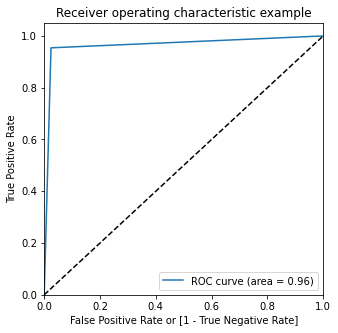

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.940096     0.977842     0.902349   0.909204  0.977842
0.2          0.2  0.960687     0.965864     0.955509   0.955965  0.965864
0.3          0.3  0.963733     0.959550     0.967916   0.967646  0.959550
0.4          0.4  0.964703     0.956845     0.972561   0.972123  0.956845
0.5          0.5  0.964854     0.954094     0.975615   0.975079  0.954094
0.6          0.6  0.964043     0.949433     0.978653   0.978011  0.949433
0.7          0.7  0.960353     0.937678     0.983028   0.982221  0.937678
0.8          0.8  0.952805     0.915504     0.990106   0.989308  0.915504
0.9          0.9  0.940660     0.883659     0.997662   0.997361  0.883659


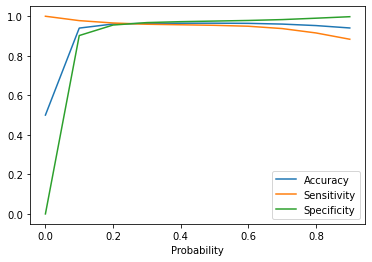

In [219]:
y_pred = lr_model.predict(X_train_lm).values.reshape(-1)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[0]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [220]:
## 0.20 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)
metric_log = print_score(y_pred_final)

Train Result:

accuracy score: 96.0700

Confusion Matrix: 
 [[60070  2797]
 [ 2146 60721]]

Sensitivity: 96.5900

Specificity: 95.5500

False Positive Rate : 4.4500

Positive Predictive Value : 95.6000

Negative Predictive Value : 96.5500

Precision : 95.6000

Recall : 96.5900



In [223]:
X_test_new = X_test[X_train_new.columns]
X_test_sm = smt.add_constant(X_test_new)
y_test_pred = lr_model.predict(X_test_sm).values.reshape(-1)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[0]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[0]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.20 else 0)

In [224]:
y_test_final_log = y_test_pred_final[['id','churn_probability']]
y_test_final_log.to_csv('submission_log.csv',index=False)

In [225]:
y_test_final_log['churn_probability'].sum()

30000

In [226]:
#Random forest

In [227]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [228]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [229]:
rf.oob_score_

0.8666072820398619

Train Result:

accuracy score: 88.1900

Confusion Matrix: 
 [[58899  3968]
 [10883 51984]]

Sensitivity: 82.6900

Specificity: 93.6900

False Positive Rate : 6.3100

Positive Predictive Value : 92.9100

Negative Predictive Value : 84.4000

Precision : 92.9100

Recall : 82.6900



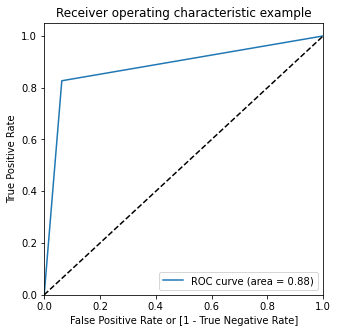

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500000     1.000000     0.000000   0.500000  1.000000
0.1          0.1  0.512534     0.999873     0.025196   0.506348  0.999873
0.2          0.2  0.760129     0.968600     0.551657   0.683584  0.968600
0.3          0.3  0.856976     0.907885     0.806067   0.823988  0.907885
0.4          0.4  0.876859     0.859211     0.894507   0.890648  0.859211
0.5          0.5  0.881886     0.826889     0.936883   0.929082  0.826889
0.6          0.6  0.877082     0.795902     0.958261   0.950171  0.795902
0.7          0.7  0.857008     0.740627     0.973388   0.965315  0.740627
0.8          0.8  0.810672     0.638141     0.983203   0.974353  0.638141
0.9          0.9  0.734551     0.480284     0.988818   0.977247  0.480284


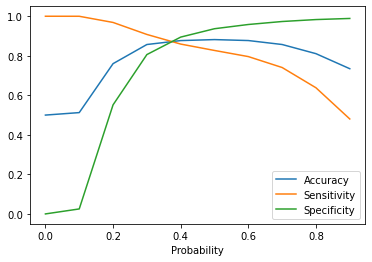

In [230]:
y_pred = rf.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [231]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
metric_rf = print_score(y_pred_final)

Train Result:

accuracy score: 87.6900

Confusion Matrix: 
 [[56235  6632]
 [ 8851 54016]]

Sensitivity: 85.9200

Specificity: 89.4500

False Positive Rate : 10.5500

Positive Predictive Value : 89.0600

Negative Predictive Value : 86.4000

Precision : 89.0600

Recall : 85.9200



In [232]:
y_test_pred = rf.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

In [233]:
y_test_final_rf = y_test_pred_final[['id','churn_probability']]
y_test_final_rf.to_csv('submission_rf.csv',index=False)

In [234]:
y_test_final_rf['churn_probability'].sum()

0

In [235]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [236]:
params = {
    'max_depth': [20],
    'min_samples_leaf': [5],
    'n_estimators': [50]
}

In [237]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [238]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/priyeshshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_s

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20], 'min_samples_leaf': [5],
                         'n_estimators': [50]},
             scoring='accuracy', verbose=1)

In [239]:
grid_search.best_score_

0.7541693825433311

In [240]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [241]:
rf_best.feature_importances_

array([8.34735559e-03, 8.50272908e-03, 1.21080520e-02, 4.08905791e-02,
       1.18382536e-02, 2.22207117e-02, 6.01187672e-02, 1.27601939e-02,
       1.56067472e-02, 8.79192062e-02, 7.92566625e-03, 8.86028457e-03,
       5.04867350e-02, 1.08496357e-02, 1.44451044e-02, 3.23023394e-02,
       1.15851087e-03, 1.53879386e-03, 1.83272544e-03, 1.91193631e-03,
       2.64320600e-03, 2.07367317e-03, 9.08531413e-05, 9.63015342e-05,
       5.22357589e-05, 8.73392253e-04, 1.05557874e-03, 2.22362811e-03,
       7.67452785e-04, 1.11135452e-03, 1.92508107e-03, 3.65248830e-04,
       3.50138443e-04, 1.39603888e-03, 1.83780900e-04, 2.52533397e-04,
       3.46457160e-04, 1.67805345e-02, 2.59369195e-03, 4.15652326e-03,
       1.40236156e-02, 8.05645569e-03, 1.30394454e-02, 3.84230093e-02,
       3.13947916e-03, 5.53274712e-03, 1.66953254e-02, 1.96042418e-02,
       3.55369762e-02, 1.46603410e-01, 4.63758266e-03, 1.15574027e-02,
       1.26258286e-01, 5.67543519e-03, 1.32533646e-02, 7.47272056e-02,
      

In [242]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [243]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
49,local_8,0.146603
52,std_8,0.126258
9,total_ic_mou_8,0.087919
55,spl_8,0.074727
6,total_og_mou_8,0.060119
12,total_rech_amt_8,0.050487
3,arpu_8,0.040891
43,total_rech_8,0.038423
48,local_7,0.035537
15,last_day_rch_amt_8,0.032302


Train Result:

accuracy score: 96.7900

Confusion Matrix: 
 [[61512  1355]
 [ 2681 60186]]

Sensitivity: 95.7400

Specificity: 97.8400

False Positive Rate : 2.1600

Positive Predictive Value : 97.8000

Negative Predictive Value : 95.8200

Precision : 97.8000

Recall : 95.7400



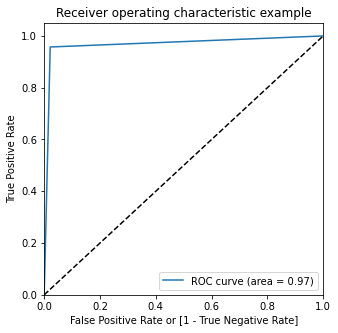

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.500740     1.000000     0.001479   0.500370  1.000000
0.1          0.1  0.865693     0.999905     0.731481   0.788305  0.999905
0.2          0.2  0.949266     0.998346     0.900186   0.909108  0.998346
0.3          0.3  0.971408     0.992444     0.950371   0.952375  0.992444
0.4          0.4  0.974494     0.979544     0.969443   0.969749  0.979544
0.5          0.5  0.967900     0.957354     0.978447   0.977982  0.957354
0.6          0.6  0.957681     0.930425     0.984936   0.984068  0.930425
0.7          0.7  0.943253     0.895430     0.991076   0.990133  0.895430
0.8          0.8  0.921167     0.845976     0.996357   0.995713  0.845976
0.9          0.9  0.881440     0.763739     0.999141   0.998877  0.763739


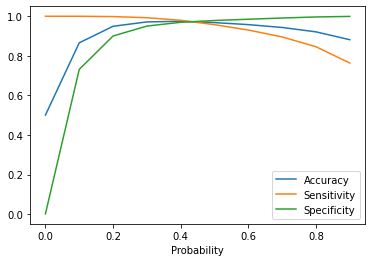

In [244]:
y_pred = rf_best.predict_proba(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [245]:
## 0.2 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
metric_rf_best = print_score(y_pred_final)

Train Result:

accuracy score: 97.3700

Confusion Matrix: 
 [[61107  1760]
 [ 1541 61326]]

Sensitivity: 97.5500

Specificity: 97.2000

False Positive Rate : 2.8000

Positive Predictive Value : 97.2100

Negative Predictive Value : 97.5400

Precision : 97.2100

Recall : 97.5500



In [246]:
y_test_pred = rf_best.predict_proba(X_test)
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)

In [247]:
y_test_final_rf_best = y_test_pred_final[['id','churn_probability']]
y_test_final_rf_best.to_csv('submission_rf_best.csv',index=False)

In [248]:
y_test_final_rf_best['churn_probability'].sum()

2962

In [249]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['Accuracy Score','Sensitivity','Specifity','False Positive rate',
                       'Positive Predictive value','Negative Predictive Value', 'Precision', 'Recall'], 
        'PCA': metric_pca
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'PCA'] )

pca2_metric = pd.Series(metric_pca2, name = 'PCA Again')
dt_metric = pd.Series(metric_dt, name = 'Decision Tree')
clf_metric = pd.Series(metric_bag_clf, name = 'Bagging classifier')
bag_clf_oob_metric = pd.Series(metric_bag_clf_oob, name = 'Bagging classifier OOB')
xgb_metric = pd.Series(metric_xgb, name = 'XGB')
log_metric = pd.Series(metric_log, name = 'Logistic')
rf_metric = pd.Series(metric_rf, name = 'Random Forest')
rf_best_metric = pd.Series(metric_rf_best, name = 'Random Forest Best')

final_metric = pd.concat([lr_metric, pca2_metric, dt_metric, clf_metric, 
                          bag_clf_oob_metric, xgb_metric, log_metric, rf_metric, rf_best_metric], axis = 1)

final_metric

,Metric,PCA,PCA Again,Decision Tree,Bagging classifier,Bagging classifier OOB,XGB,Logistic,Random Forest,Random Forest Best
0,Accuracy Score,89.21,89.50,89.07,90.58,90.58,98.05,96.07,87.69,97.37
1,Sensitivity,89.61,89.86,88.00,89.23,89.23,100.00,96.59,85.92,97.55
2,Specifity,88.80,89.15,90.15,91.92,91.92,96.11,95.55,89.45,97.20
3,False Positive rate,11.20,10.85,9.85,8.08,8.08,3.89,4.45,10.55,2.80
4,Positive Predictive value,88.89,89.22,89.93,91.70,91.70,96.26,95.60,89.06,97.21
5,Negative Predictive Value,89.53,89.79,88.25,89.52,89.52,100.00,96.55,86.40,97.54
6,Precision,88.89,89.22,89.93,91.70,91.70,96.26,95.60,89.06,97.21
7,Recall,89.61,89.86,88.00,89.23,89.23,100.00,96.59,85.92,97.55


In [ ]:
#Based on above metrics XGBoost and Random Forest is giving best output

In [ ]:
#Top 5 Features which help in deriving Churn as per Random Forest
#total_ic_mou_8
#local_8
#total_og_mou_8
#arpu_8
#total_rech_amt_8

#Any reduction in above values is the prediction customer will likely churn.